In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

In [3]:
warnings.filterwarnings(action="ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - Intercement data

In [4]:
df = pd.read_csv("../../../data/raw/partner_ii/db3_cement.csv")

<IPython.core.display.Javascript object>

In [5]:
df = df[df["strength_28d"].notna()].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [6]:
df = df[df["unified_material_name"] == "Type I-II"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(735, 29)

<IPython.core.display.Javascript object>

In [8]:
df.head()

sample_date  sample_id_plant unified_material_name  \
0  2020-01-01 11:00:00+00:00          1058402             Type I-II   
1  2020-01-02 11:00:00+00:00          1058587             Type I-II   
2  2020-01-03 11:00:00+00:00          1058734             Type I-II   
3  2020-01-04 11:00:00+00:00          1058895             Type I-II   
4  2020-01-07 11:00:00+00:00          1059218             Type I-II   

      raw_material_code    cao   sio2  al2o3  fe2o3   mgo   so3  ...   loi  \
0  Daily Average Cement  63.45  19.63   4.90   3.30  3.50  2.89  ...  3.08   
1  Daily Average Cement  62.34  19.28   4.81   3.29  3.48  2.85  ...  3.38   
2  Daily Average Cement  62.18  19.29   4.85   3.33  3.47  2.87  ...  3.20   
3  Daily Average Cement  61.97  19.28   4.93   3.39  3.49  2.87  ...  2.94   
4  Daily Average Cement  61.80  19.20   4.87   3.41  3.34  2.84  ...  3.18   

   water_demand  setting_initial  strength_1d  strength_3d  strength_7d  \
0          24.5            160.0        16.41        28.32        34.34   
1          24.5            160.0        14.46        26.75        32.40   
2          26.0            155.0        16.32        27.53        31.72   
3          26.0            160.0        17.00        29.42        34.00   
4          24.5            160.0        15.72        28.40        34.76   

   strength_28d  blaine  sieve_32um  sieve_45um  
0         42.93   386.0        7.68       95.25  
1         39.49   384.0        8.35       95.44  
2         40.55   373.0        6.76       96.62  
3         42.64   377.0        6.47       96.78  
4         40.23   393.0        8.68       95.66  

[5 rows x 29 columns]

<IPython.core.display.Javascript object>

In [9]:
df.tail()

sample_date  sample_id_plant unified_material_name  \
730  2021-12-23 11:00:00+00:00          1180316             Type I-II   
731  2021-12-24 11:00:00+00:00          1180519             Type I-II   
732  2021-12-25 11:00:00+00:00          1180696             Type I-II   
733  2021-12-26 11:00:00+00:00          1180853             Type I-II   
734  2021-12-31 11:00:00+00:00          1181618             Type I-II   

        raw_material_code    cao   sio2  al2o3  fe2o3   mgo   so3  ...   loi  \
730  Daily Average Cement  62.99  19.33   4.44   3.32  1.96  2.91  ...  3.47   
731  Daily Average Cement  62.97  19.33   4.41   3.31  1.92  2.90  ...  3.41   
732  Daily Average Cement  62.79  19.60   4.42   3.30  1.97  2.95  ...  3.16   
733  Daily Average Cement  62.89  19.51   4.36   3.26  2.07  2.92  ...  3.29   
734  Daily Average Cement  62.95  19.38   4.44   3.22  2.35  2.91  ...  3.21   

     water_demand  setting_initial  strength_1d  strength_3d  strength_7d  \
730          25.0            160.0        14.66        25.57        32.44   
731          25.0            165.0        14.76        26.85        30.04   
732          25.0            170.0        12.85        26.50        29.75   
733          25.0            170.0        12.50        25.87        30.72   
734          25.0            170.0        13.48        25.22        28.58   

     strength_28d  blaine  sieve_32um  sieve_45um  
730         37.27   394.0        4.32       97.20  
731         38.28   394.0        4.87       97.76  
732         37.12   390.0        4.87       98.91  
733         40.22   389.0        5.11       96.94  
734         36.77   384.0        5.60       98.39  

[5 rows x 29 columns]

<IPython.core.display.Javascript object>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_date            735 non-null    object 
 1   sample_id_plant        735 non-null    int64  
 2   unified_material_name  735 non-null    object 
 3   raw_material_code      735 non-null    object 
 4   cao                    726 non-null    float64
 5   sio2                   726 non-null    float64
 6   al2o3                  726 non-null    float64
 7   fe2o3                  726 non-null    float64
 8   mgo                    726 non-null    float64
 9   so3                    726 non-null    float64
 10  k2o                    726 non-null    float64
 11  na2o                   726 non-null    float64
 12  cl                     1 non-null      float64
 13  tio2                   1 non-null      float64
 14  alite                  714 non-null    float64
 15  belite

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [11]:
df.dtypes.value_counts()

float64    25
object      3
int64       1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [12]:
df.describe().transpose()

count          mean           std         min           25%  \
sample_id_plant  735.0  1.114944e+06  34862.294667  1058402.00  1.084568e+06   
cao              726.0  6.213408e+01      0.487112       60.36  6.189250e+01   
sio2             726.0  1.925353e+01      0.231384       18.37  1.909000e+01   
al2o3            726.0  4.708994e+00      0.136825        4.36  4.600000e+00   
fe2o3            726.0  3.237865e+00      0.075523        3.07  3.190000e+00   
mgo              726.0  2.997603e+00      0.314888        1.85  2.860000e+00   
so3              726.0  2.932658e+00      0.085731        2.57  2.880000e+00   
k2o              726.0  6.370110e-01      0.050115        0.53  6.000000e-01   
na2o             726.0  7.986226e-02      0.033076        0.01  5.000000e-02   
cl                 1.0  0.000000e+00           NaN        0.00  0.000000e+00   
tio2               1.0  7.000000e-02           NaN        0.07  7.000000e-02   
alite            714.0  5.737992e+01      2.488923       32.64  5.588000e+01   
belite           714.0  1.487398e+01      2.069909       10.02  1.357250e+01   
aluminate        714.0  5.403431e+00      0.539076        1.34  5.060000e+00   
ferrite          714.0  1.099574e+01      0.486330        9.64  1.069000e+01   
free_lime        717.0  1.004240e+00      0.191350        0.49  8.600000e-01   
loi              735.0  3.153061e+00      0.193256        1.67  3.070000e+00   
water_demand     735.0  2.543129e+01      0.492837       24.00  2.500000e+01   
setting_initial  735.0  1.544639e+02     12.303983      115.00  1.450000e+02   
strength_1d      734.0  1.573422e+01      1.006420       12.10  1.503000e+01   
strength_3d      734.0  2.754877e+01      1.667832       22.15  2.644500e+01   
strength_7d      734.0  3.390837e+01      2.085490       27.74  3.251000e+01   
strength_28d     735.0  4.186954e+01      2.349089       34.15  4.032500e+01   
blaine           735.0  3.777701e+02      9.527112      349.00  3.720000e+02   
sieve_32um       735.0  6.870776e+00      1.330988        3.68  5.870000e+00   
sieve_45um       735.0  9.662205e+01      3.330914        9.76  9.617000e+01   

                         50%           75%         max  
sample_id_plant  1114179.000  1.141783e+06  1181618.00  
cao                   62.150  6.244000e+01       64.65  
sio2                  19.260  1.939000e+01       20.00  
al2o3                  4.720  4.820000e+00        5.04  
fe2o3                  3.230  3.290000e+00        3.45  
mgo                    3.000  3.170000e+00        3.89  
so3                    2.910  2.950000e+00        3.22  
k2o                    0.630  6.700000e-01        0.78  
na2o                   0.075  1.100000e-01        0.17  
cl                     0.000  0.000000e+00        0.00  
tio2                   0.070  7.000000e-02        0.07  
alite                 57.665  5.892750e+01       63.30  
belite                14.660  1.597750e+01       31.18  
aluminate              5.380  5.690000e+00        7.35  
ferrite               10.980  1.127000e+01       16.15  
free_lime              0.980  1.140000e+00        2.00  
loi                    3.180  3.270000e+00        3.68  
water_demand          25.500  2.600000e+01       27.00  
setting_initial      155.000  1.650000e+02      185.00  
strength_1d           15.785  1.645000e+01       18.46  
strength_3d           27.540  2.881750e+01       31.68  
strength_7d           34.020  3.538750e+01       41.21  
strength_28d          41.920  4.357000e+01       48.34  
blaine               377.000  3.840000e+02      409.00  
sieve_32um             6.800  7.830000e+00       13.33  
sieve_45um            96.850  9.731500e+01       99.75

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [13]:
df.describe(exclude="number").T

count unique                        top freq
sample_date             735    675  2021-03-26 10:00:00+00:00    2
unified_material_name   735      1                  Type I-II  735
raw_material_code       735      1       Daily Average Cement  735

<IPython.core.display.Javascript object>

In [14]:
df["unified_material_name"].value_counts()

unified_material_name
Type I-II    735
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
dates = df["sample_date"]

<IPython.core.display.Javascript object>

In [16]:
print(dates.min())
print(dates.max())

2020-01-01 11:00:00+00:00
2021-12-31 11:00:00+00:00


<IPython.core.display.Javascript object>

In [17]:
dates

0      2020-01-01 11:00:00+00:00
1      2020-01-02 11:00:00+00:00
2      2020-01-03 11:00:00+00:00
3      2020-01-04 11:00:00+00:00
4      2020-01-07 11:00:00+00:00
                 ...            
730    2021-12-23 11:00:00+00:00
731    2021-12-24 11:00:00+00:00
732    2021-12-25 11:00:00+00:00
733    2021-12-26 11:00:00+00:00
734    2021-12-31 11:00:00+00:00
Name: sample_date, Length: 735, dtype: object

<IPython.core.display.Javascript object>

In [18]:
for column in df.dtypes[df.dtypes == object].keys():
    print(column, df[column].unique())


sample_date ['2020-01-01 11:00:00+00:00' '2020-01-02 11:00:00+00:00'
 '2020-01-03 11:00:00+00:00' '2020-01-04 11:00:00+00:00'
 '2020-01-07 11:00:00+00:00' '2020-01-08 11:00:00+00:00'
 '2020-01-09 11:00:00+00:00' '2020-01-10 11:00:00+00:00'
 '2020-01-11 11:00:00+00:00' '2020-01-12 11:00:00+00:00'
 '2020-01-14 11:00:00+00:00' '2020-01-15 11:00:00+00:00'
 '2020-01-16 11:00:00+00:00' '2020-01-17 11:00:00+00:00'
 '2020-01-19 11:00:00+00:00' '2020-01-20 11:00:00+00:00'
 '2020-01-21 11:00:00+00:00' '2020-01-22 11:00:00+00:00'
 '2020-01-23 11:00:00+00:00' '2020-01-24 11:00:00+00:00'
 '2020-01-25 11:00:00+00:00' '2020-01-26 11:00:00+00:00'
 '2020-01-29 11:00:00+00:00' '2020-01-30 11:00:00+00:00'
 '2020-01-31 11:00:00+00:00' '2020-02-01 11:00:00+00:00'
 '2020-02-02 11:00:00+00:00' '2020-02-03 11:00:00+00:00'
 '2020-02-04 11:00:00+00:00' '2020-02-05 11:00:00+00:00'
 '2020-02-06 11:00:00+00:00' '2020-02-07 11:00:00+00:00'
 '2020-02-08 11:00:00+00:00' '2020-02-09 11:00:00+00:00'
 '2020-02-10 11:00:

unified_material_name ['Type I-II']
raw_material_code ['Daily Average Cement']


<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

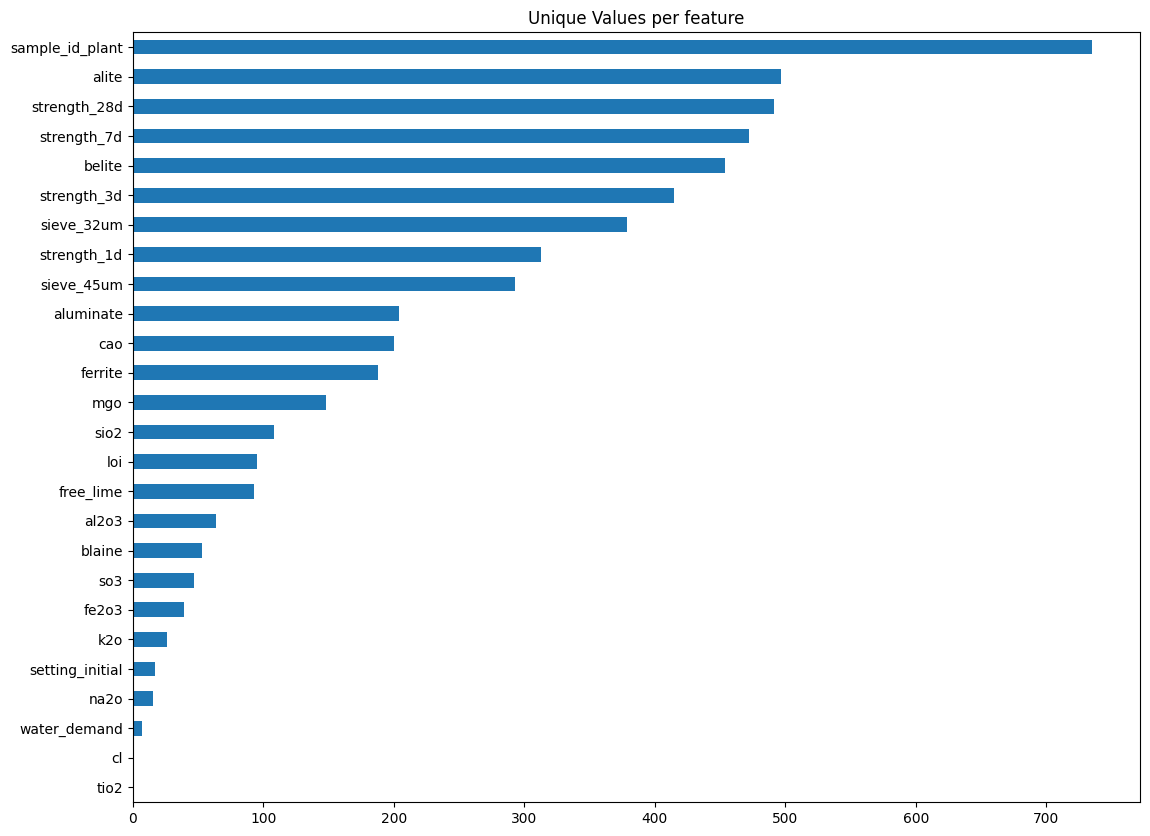

<IPython.core.display.Javascript object>

In [19]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

In [20]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'unified_material_name'),
  Text(1, 0, 'raw_material_code'),
  Text(2, 0, 'sample_date')])

<IPython.core.display.Javascript object>

<h3>2.2. Missing values</h3>

In [21]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 18 variables with missing values from a total of 29


<IPython.core.display.Javascript object>

In [22]:
df.isna().any().sort_values()

sample_date              False
blaine                   False
strength_28d             False
setting_initial          False
water_demand             False
loi                      False
sieve_32um               False
sieve_45um               False
sample_id_plant          False
unified_material_name    False
raw_material_code        False
mgo                       True
strength_7d               True
strength_3d               True
strength_1d               True
cao                       True
sio2                      True
fe2o3                     True
free_lime                 True
aluminate                 True
belite                    True
al2o3                     True
tio2                      True
cl                        True
na2o                      True
k2o                       True
so3                       True
ferrite                   True
alite                     True
dtype: bool

<IPython.core.display.Javascript object>

In [23]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [24]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  1645 missing values.


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count of quantity of missing values')

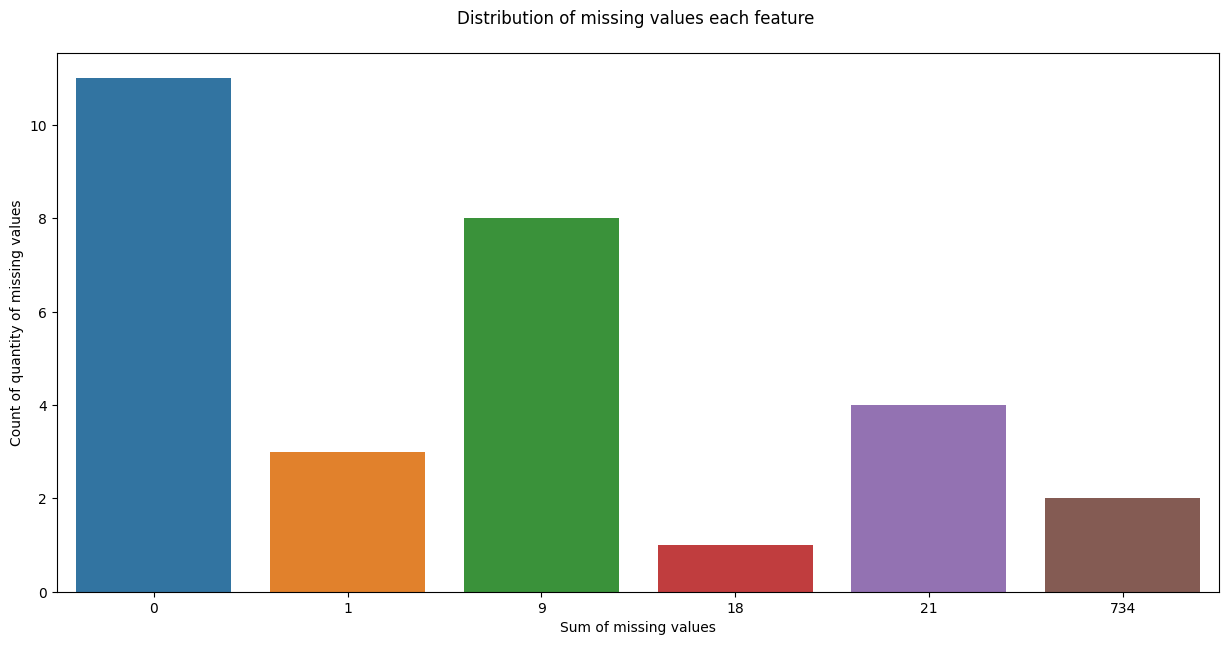

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df.isna().sum(), x=df.isna().sum().index)
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

In [26]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

<BarContainer object of 29 artists>

<IPython.core.display.Javascript object>

In [27]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [28]:
df["strength_28d"].notna().sum()

735

<IPython.core.display.Javascript object>

In [29]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<BarContainer object of 29 artists>

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [30]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [31]:
n_duplicates = df.drop(["sample_date"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

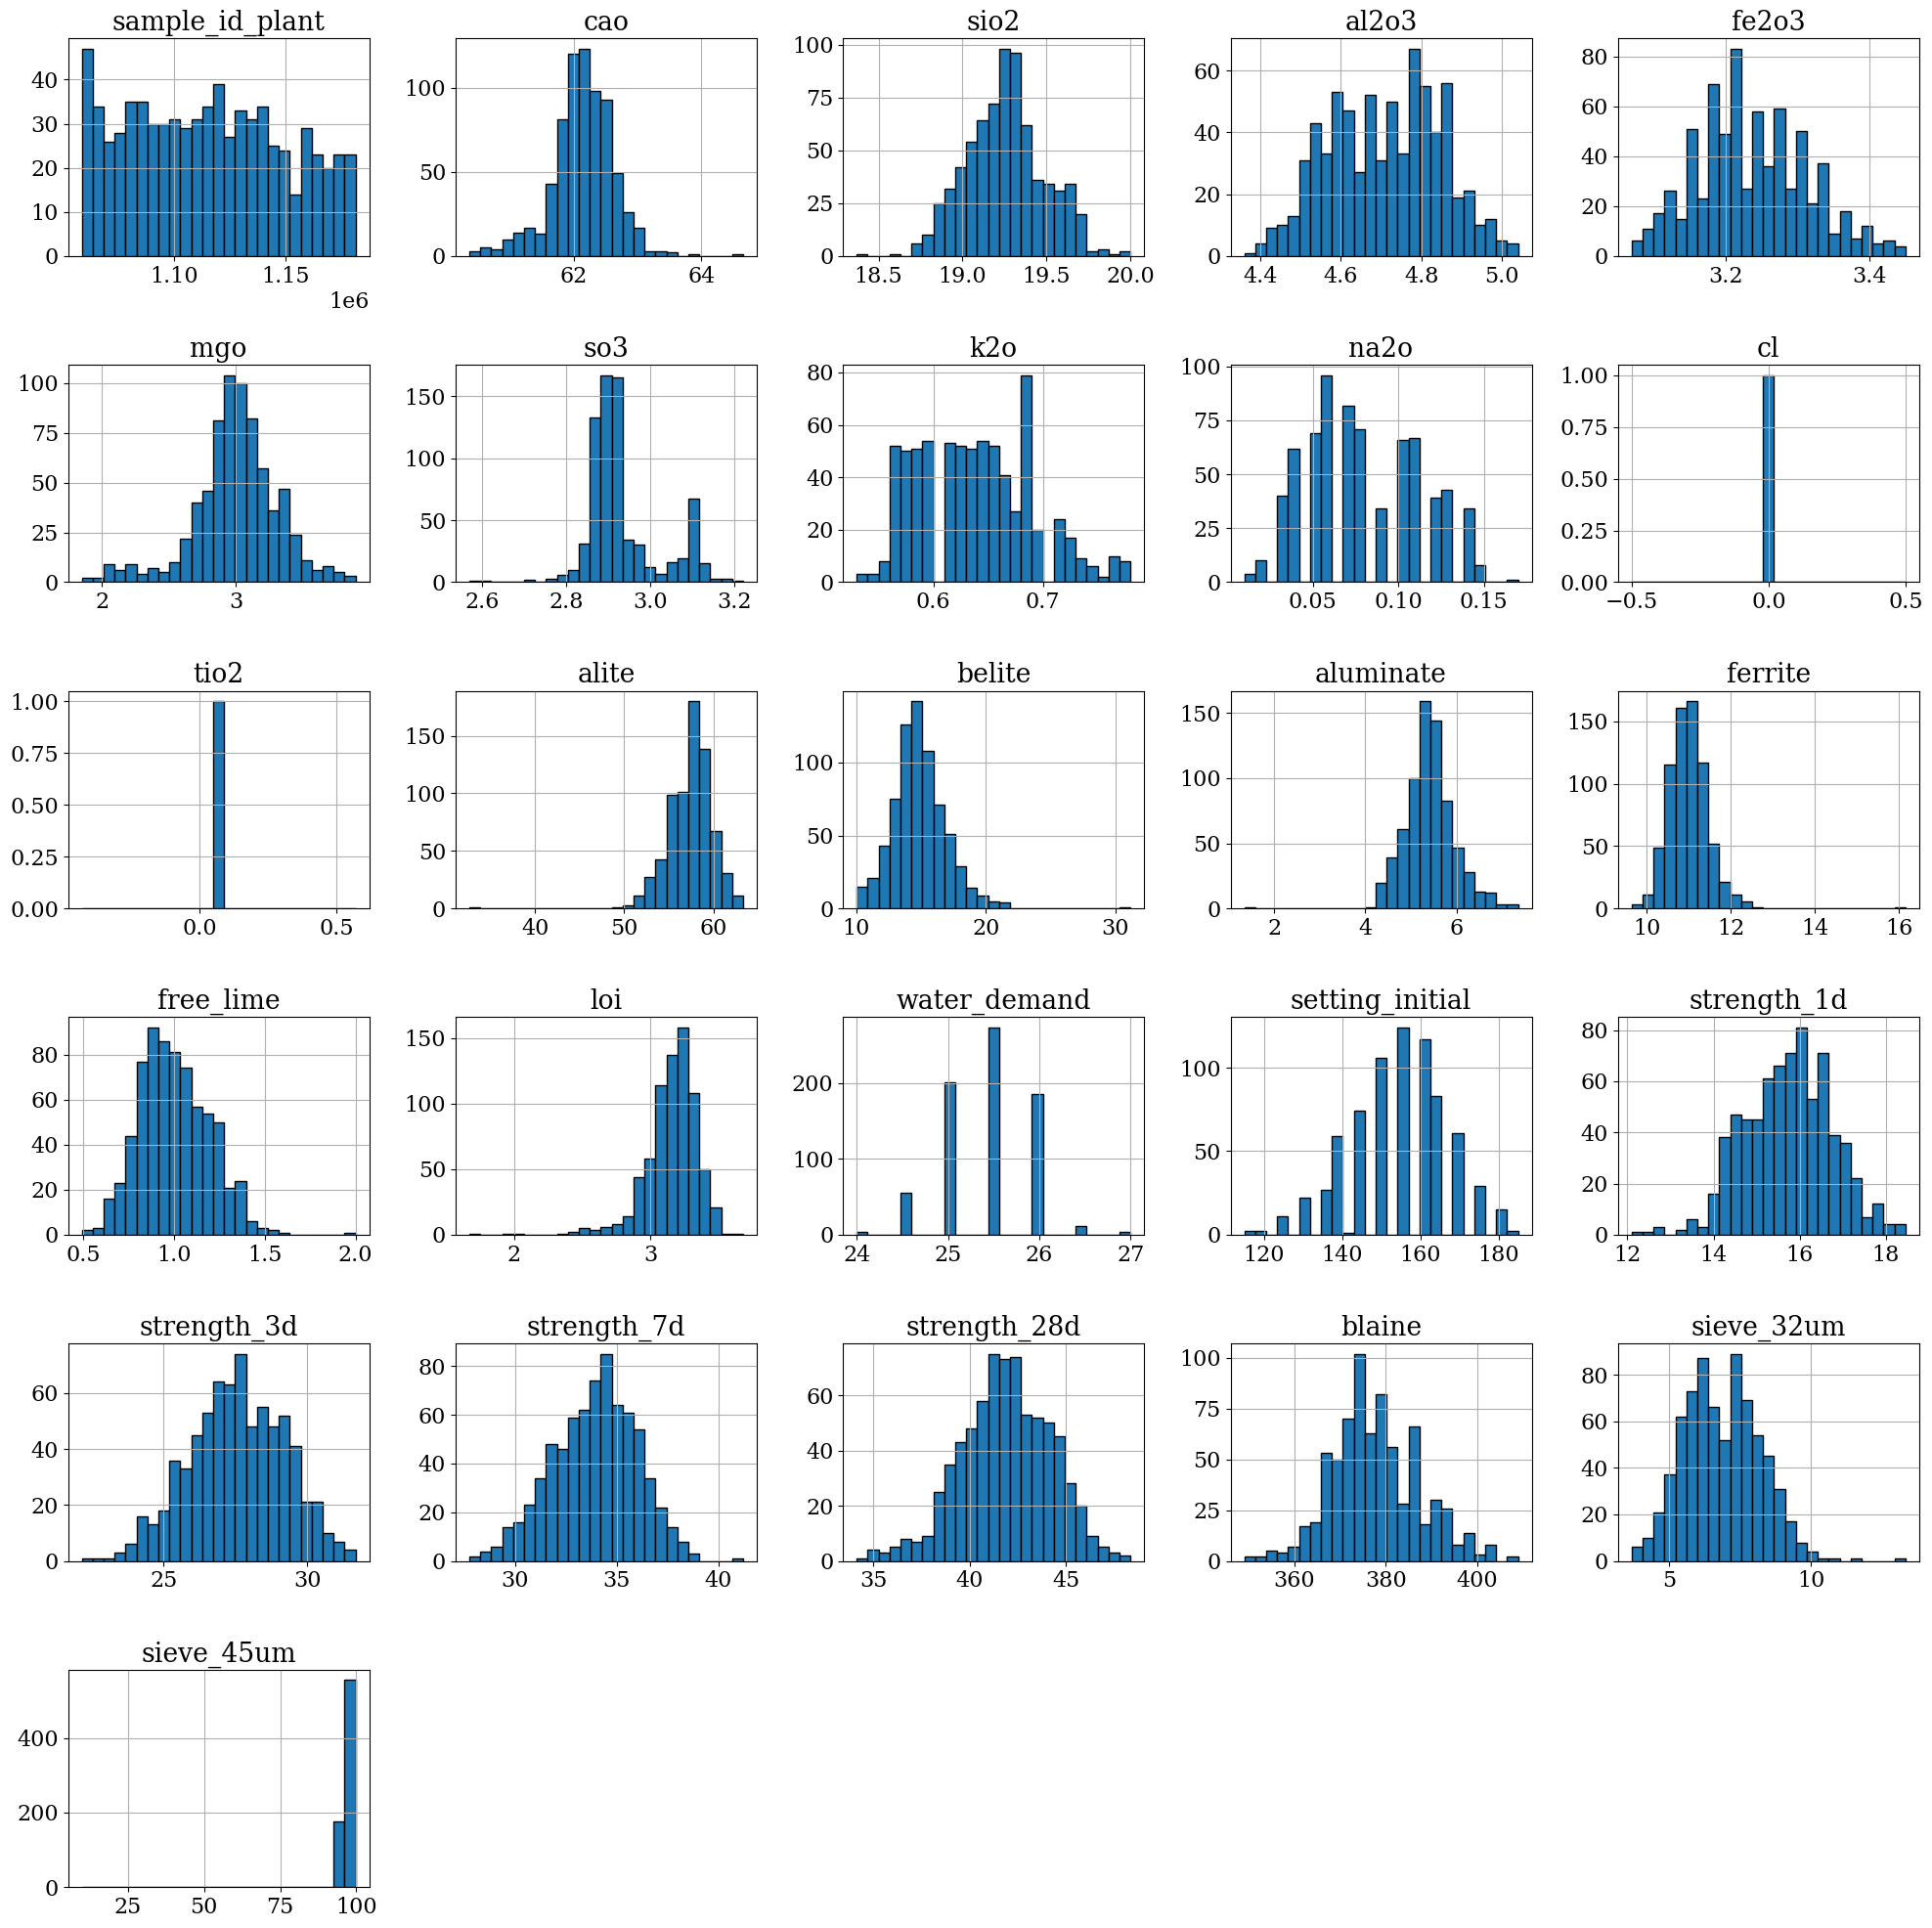

<IPython.core.display.Javascript object>

In [32]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

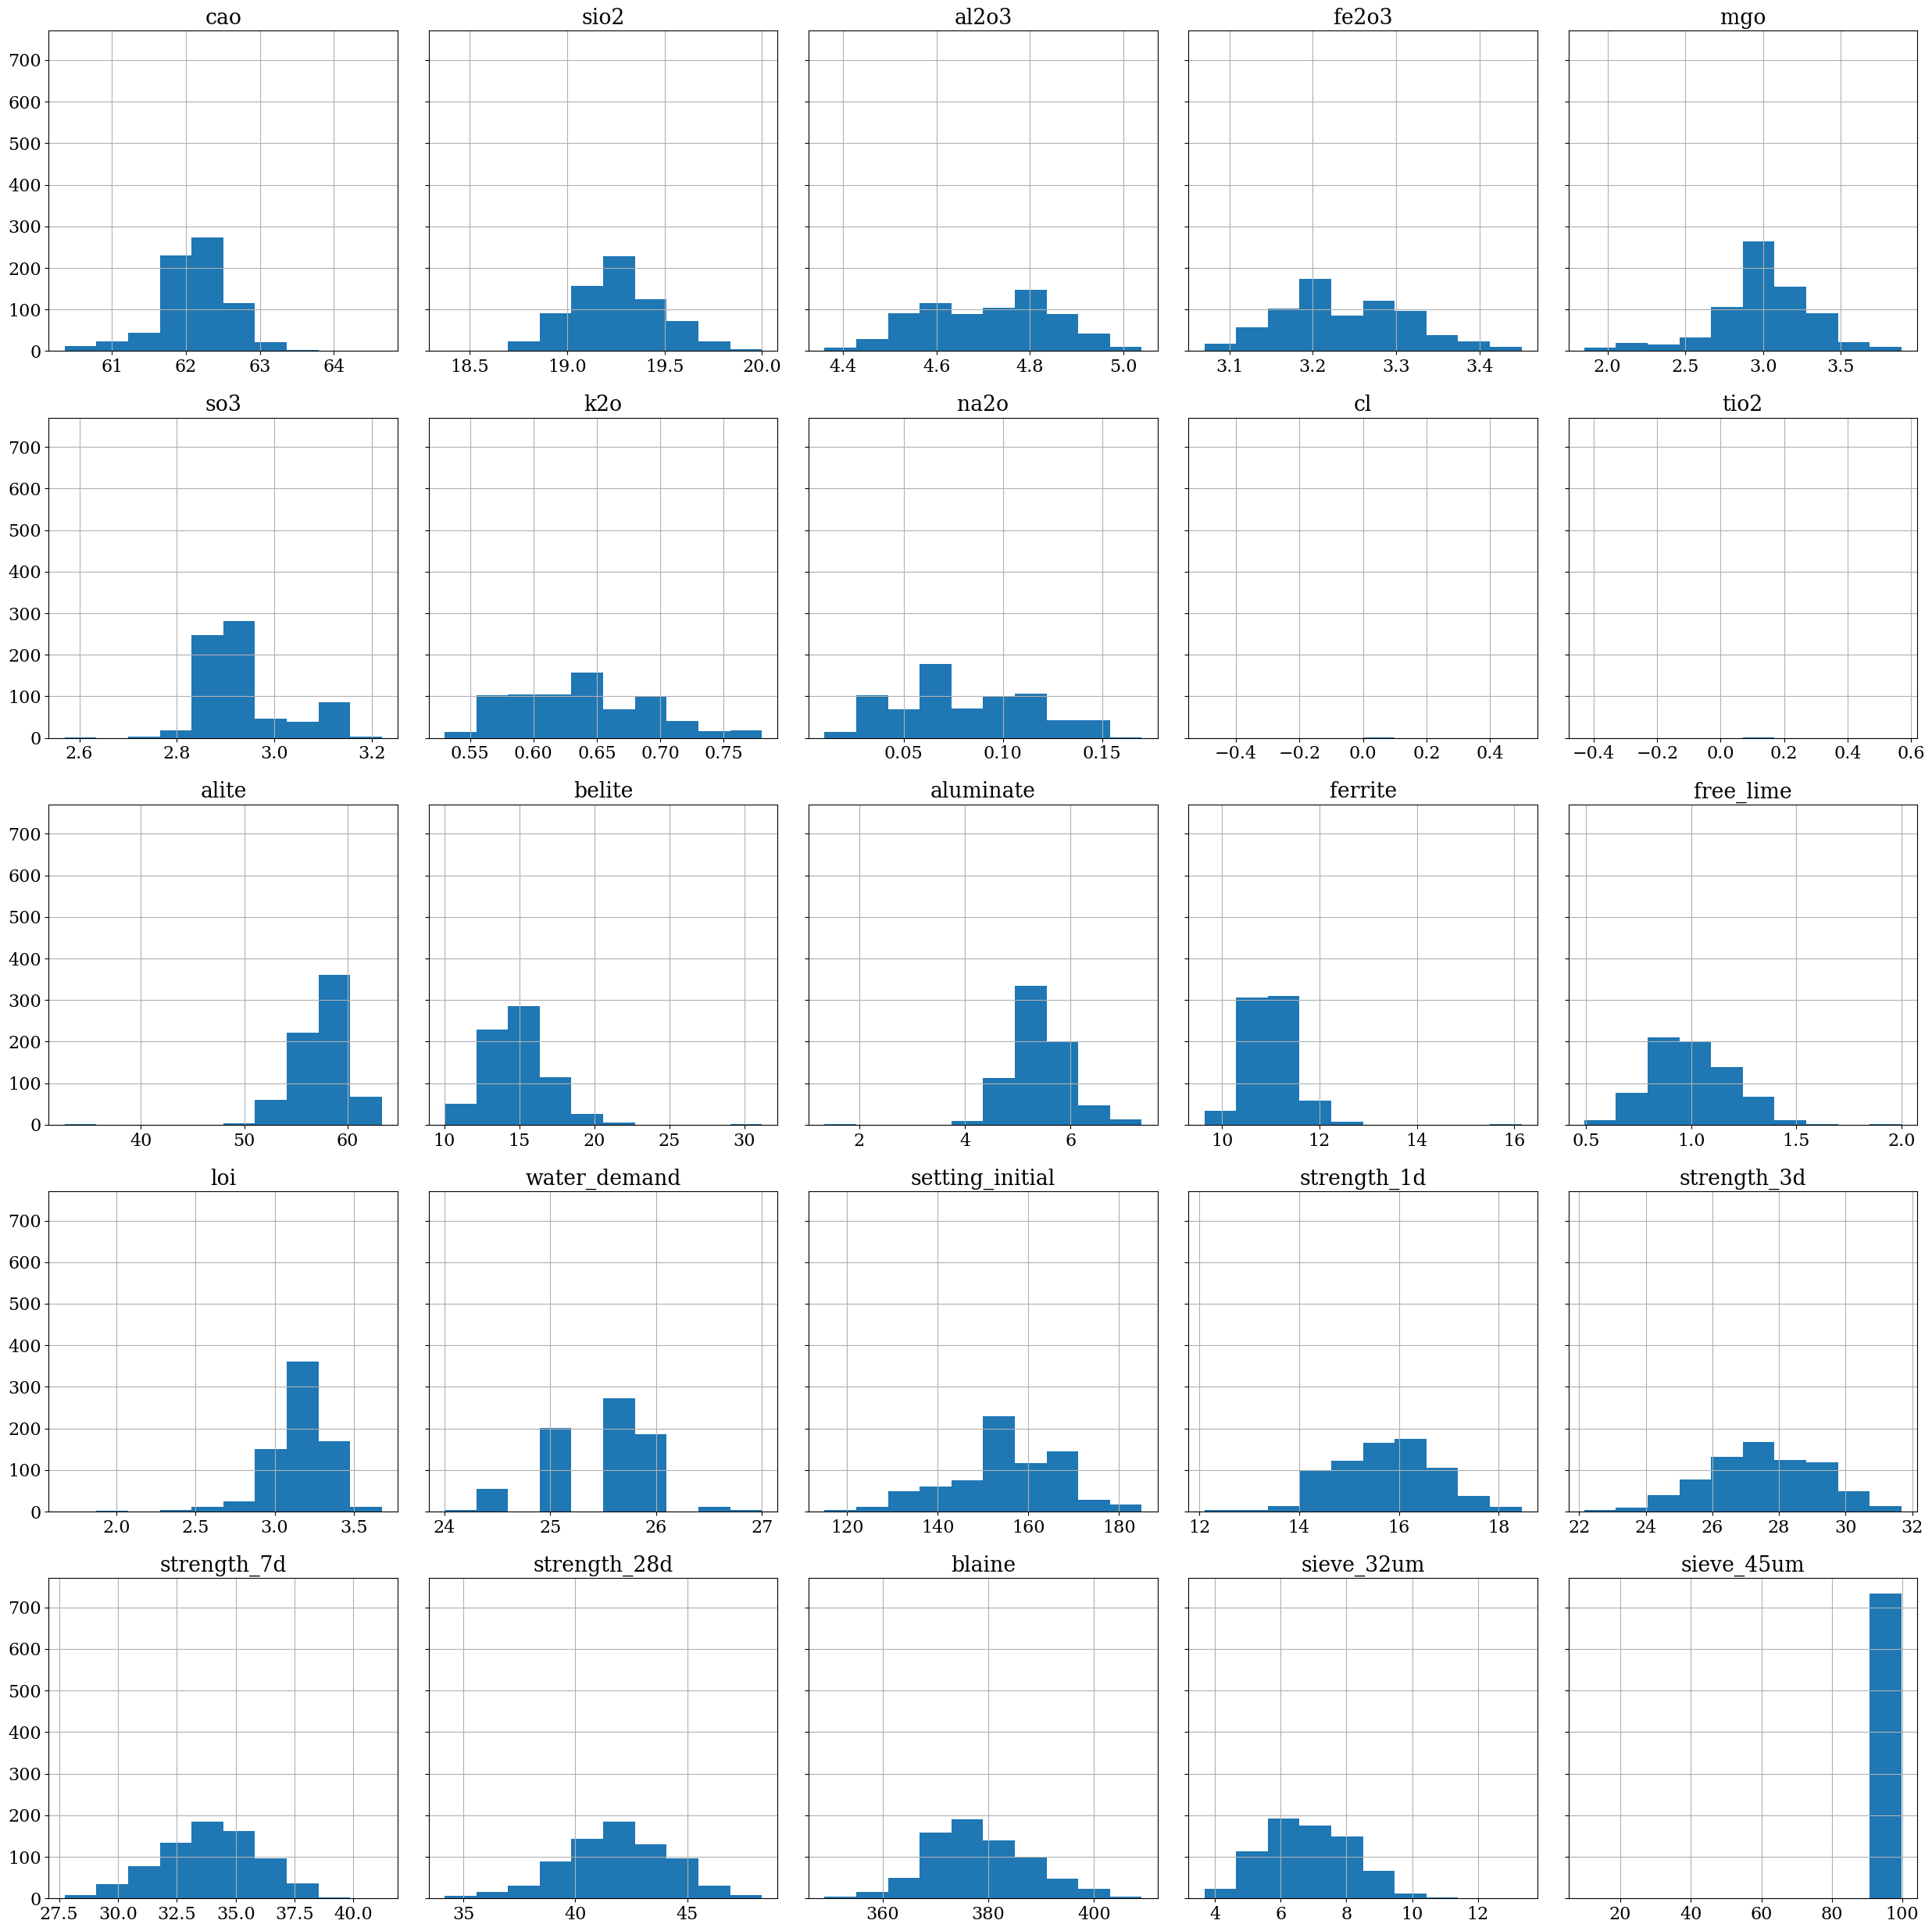

<IPython.core.display.Javascript object>

In [33]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/tmp/ipykernel_94212/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94212/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94212/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94212/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_94212/1545704410.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=T

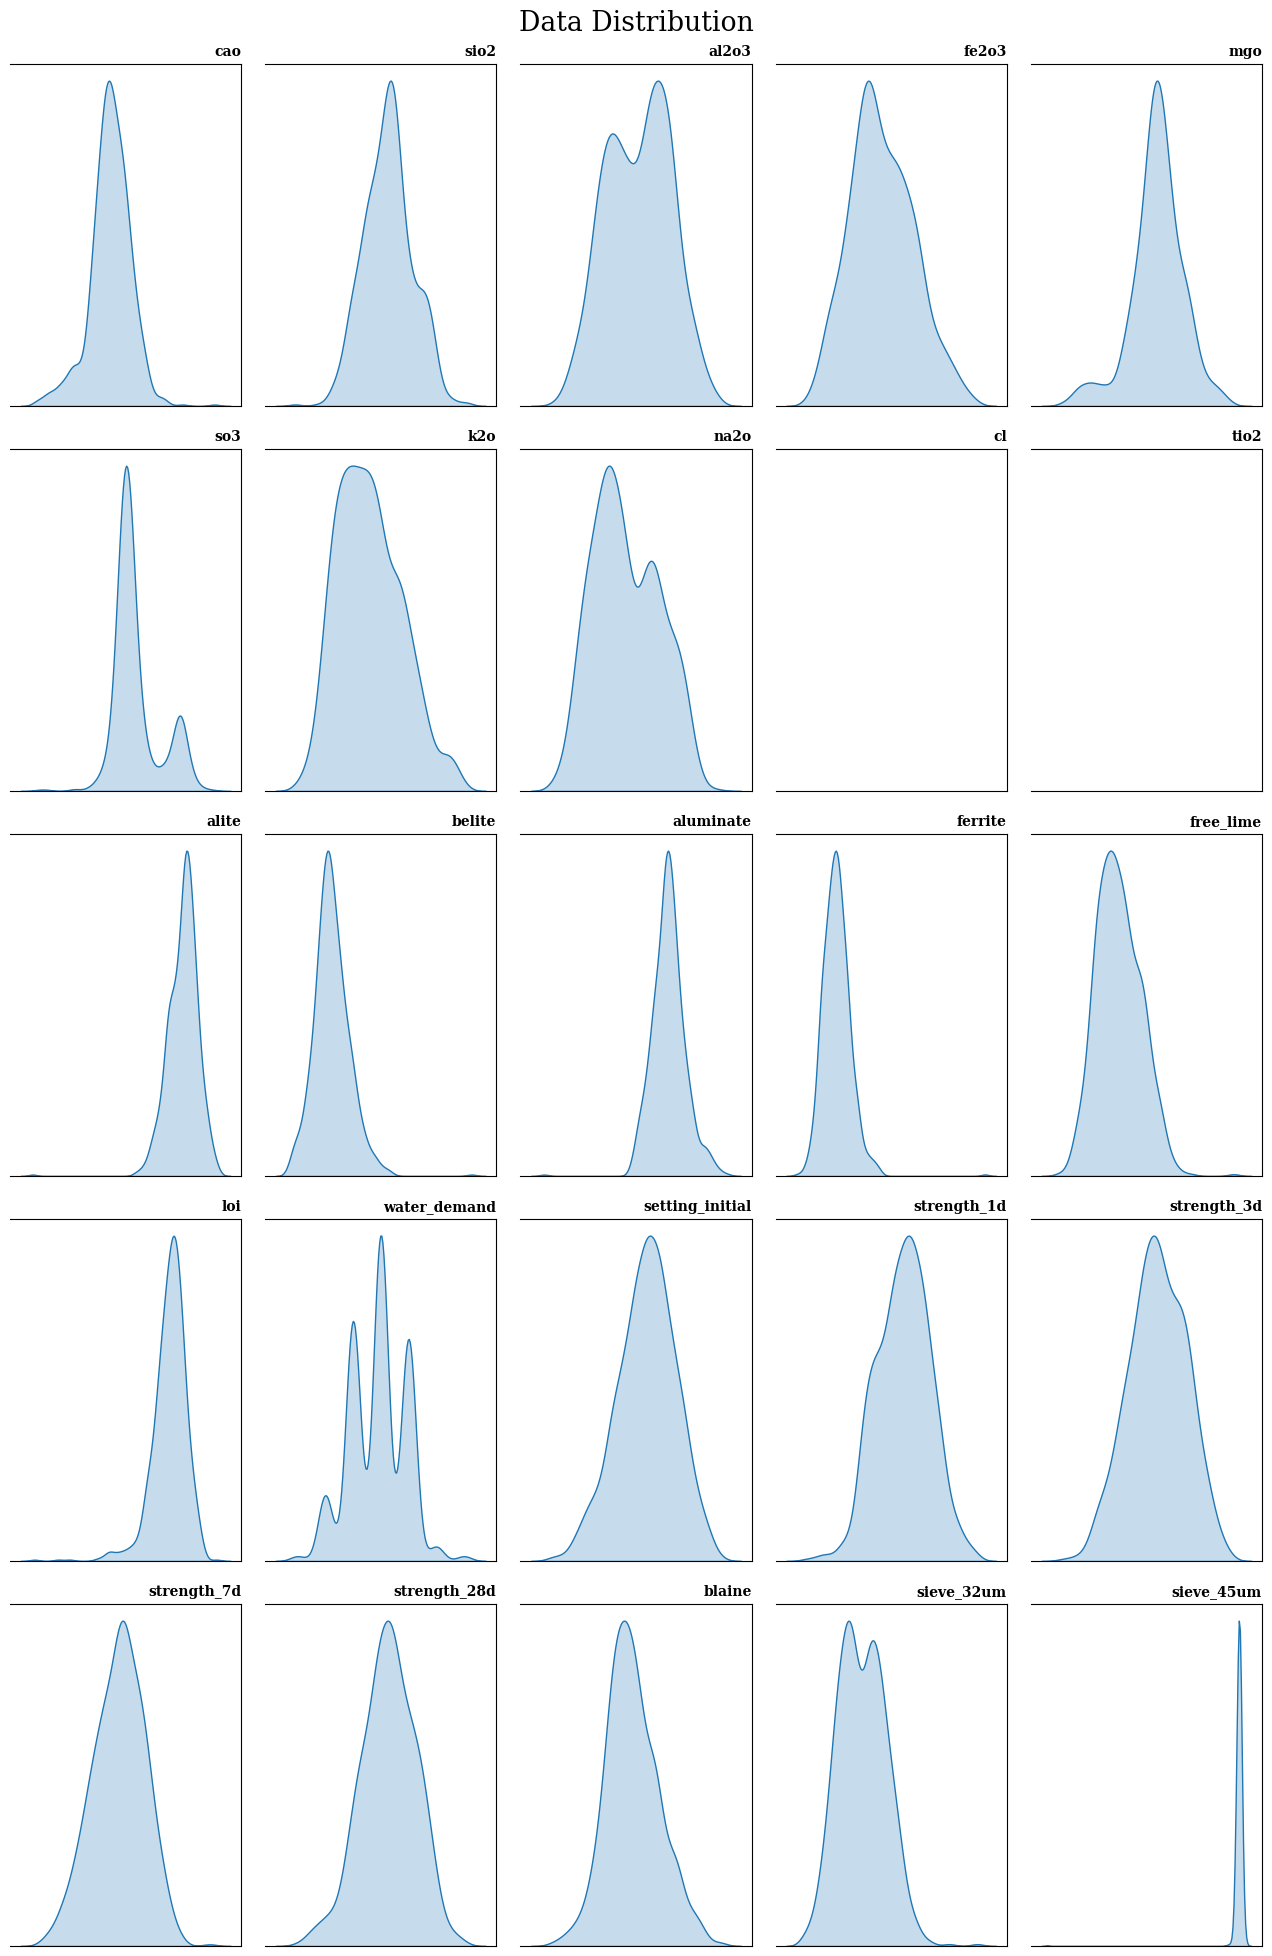

<IPython.core.display.Javascript object>

In [34]:
fig, axes = plt.subplots(5, 5, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

In [35]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(5, 5, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<IPython.core.display.Javascript object>

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<Axes: >

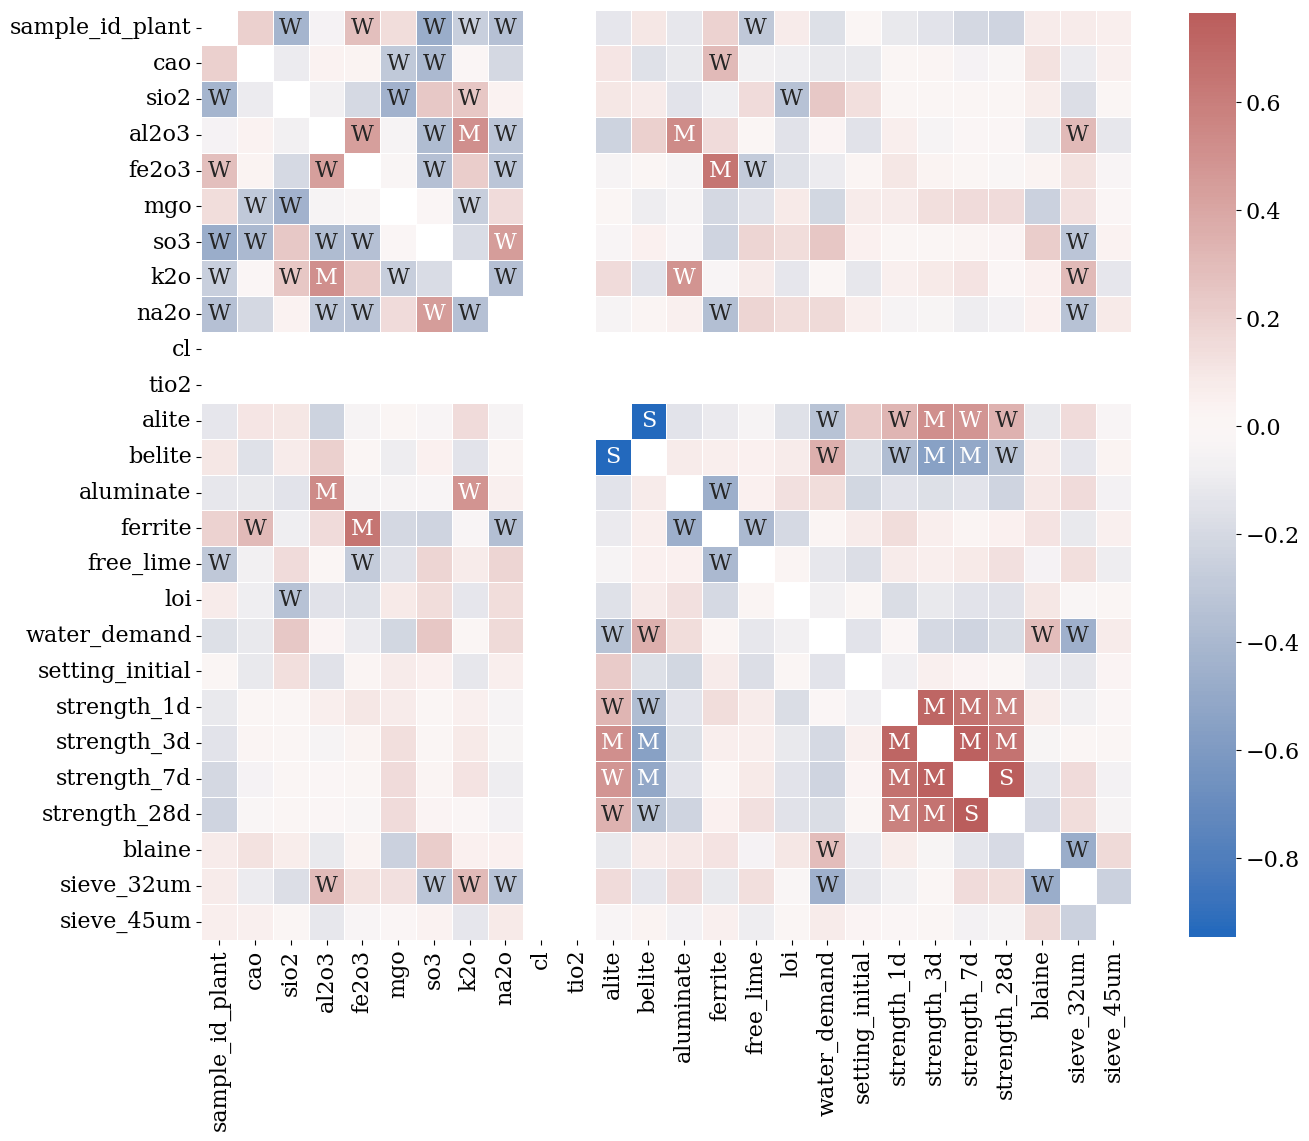

<IPython.core.display.Javascript object>

In [36]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

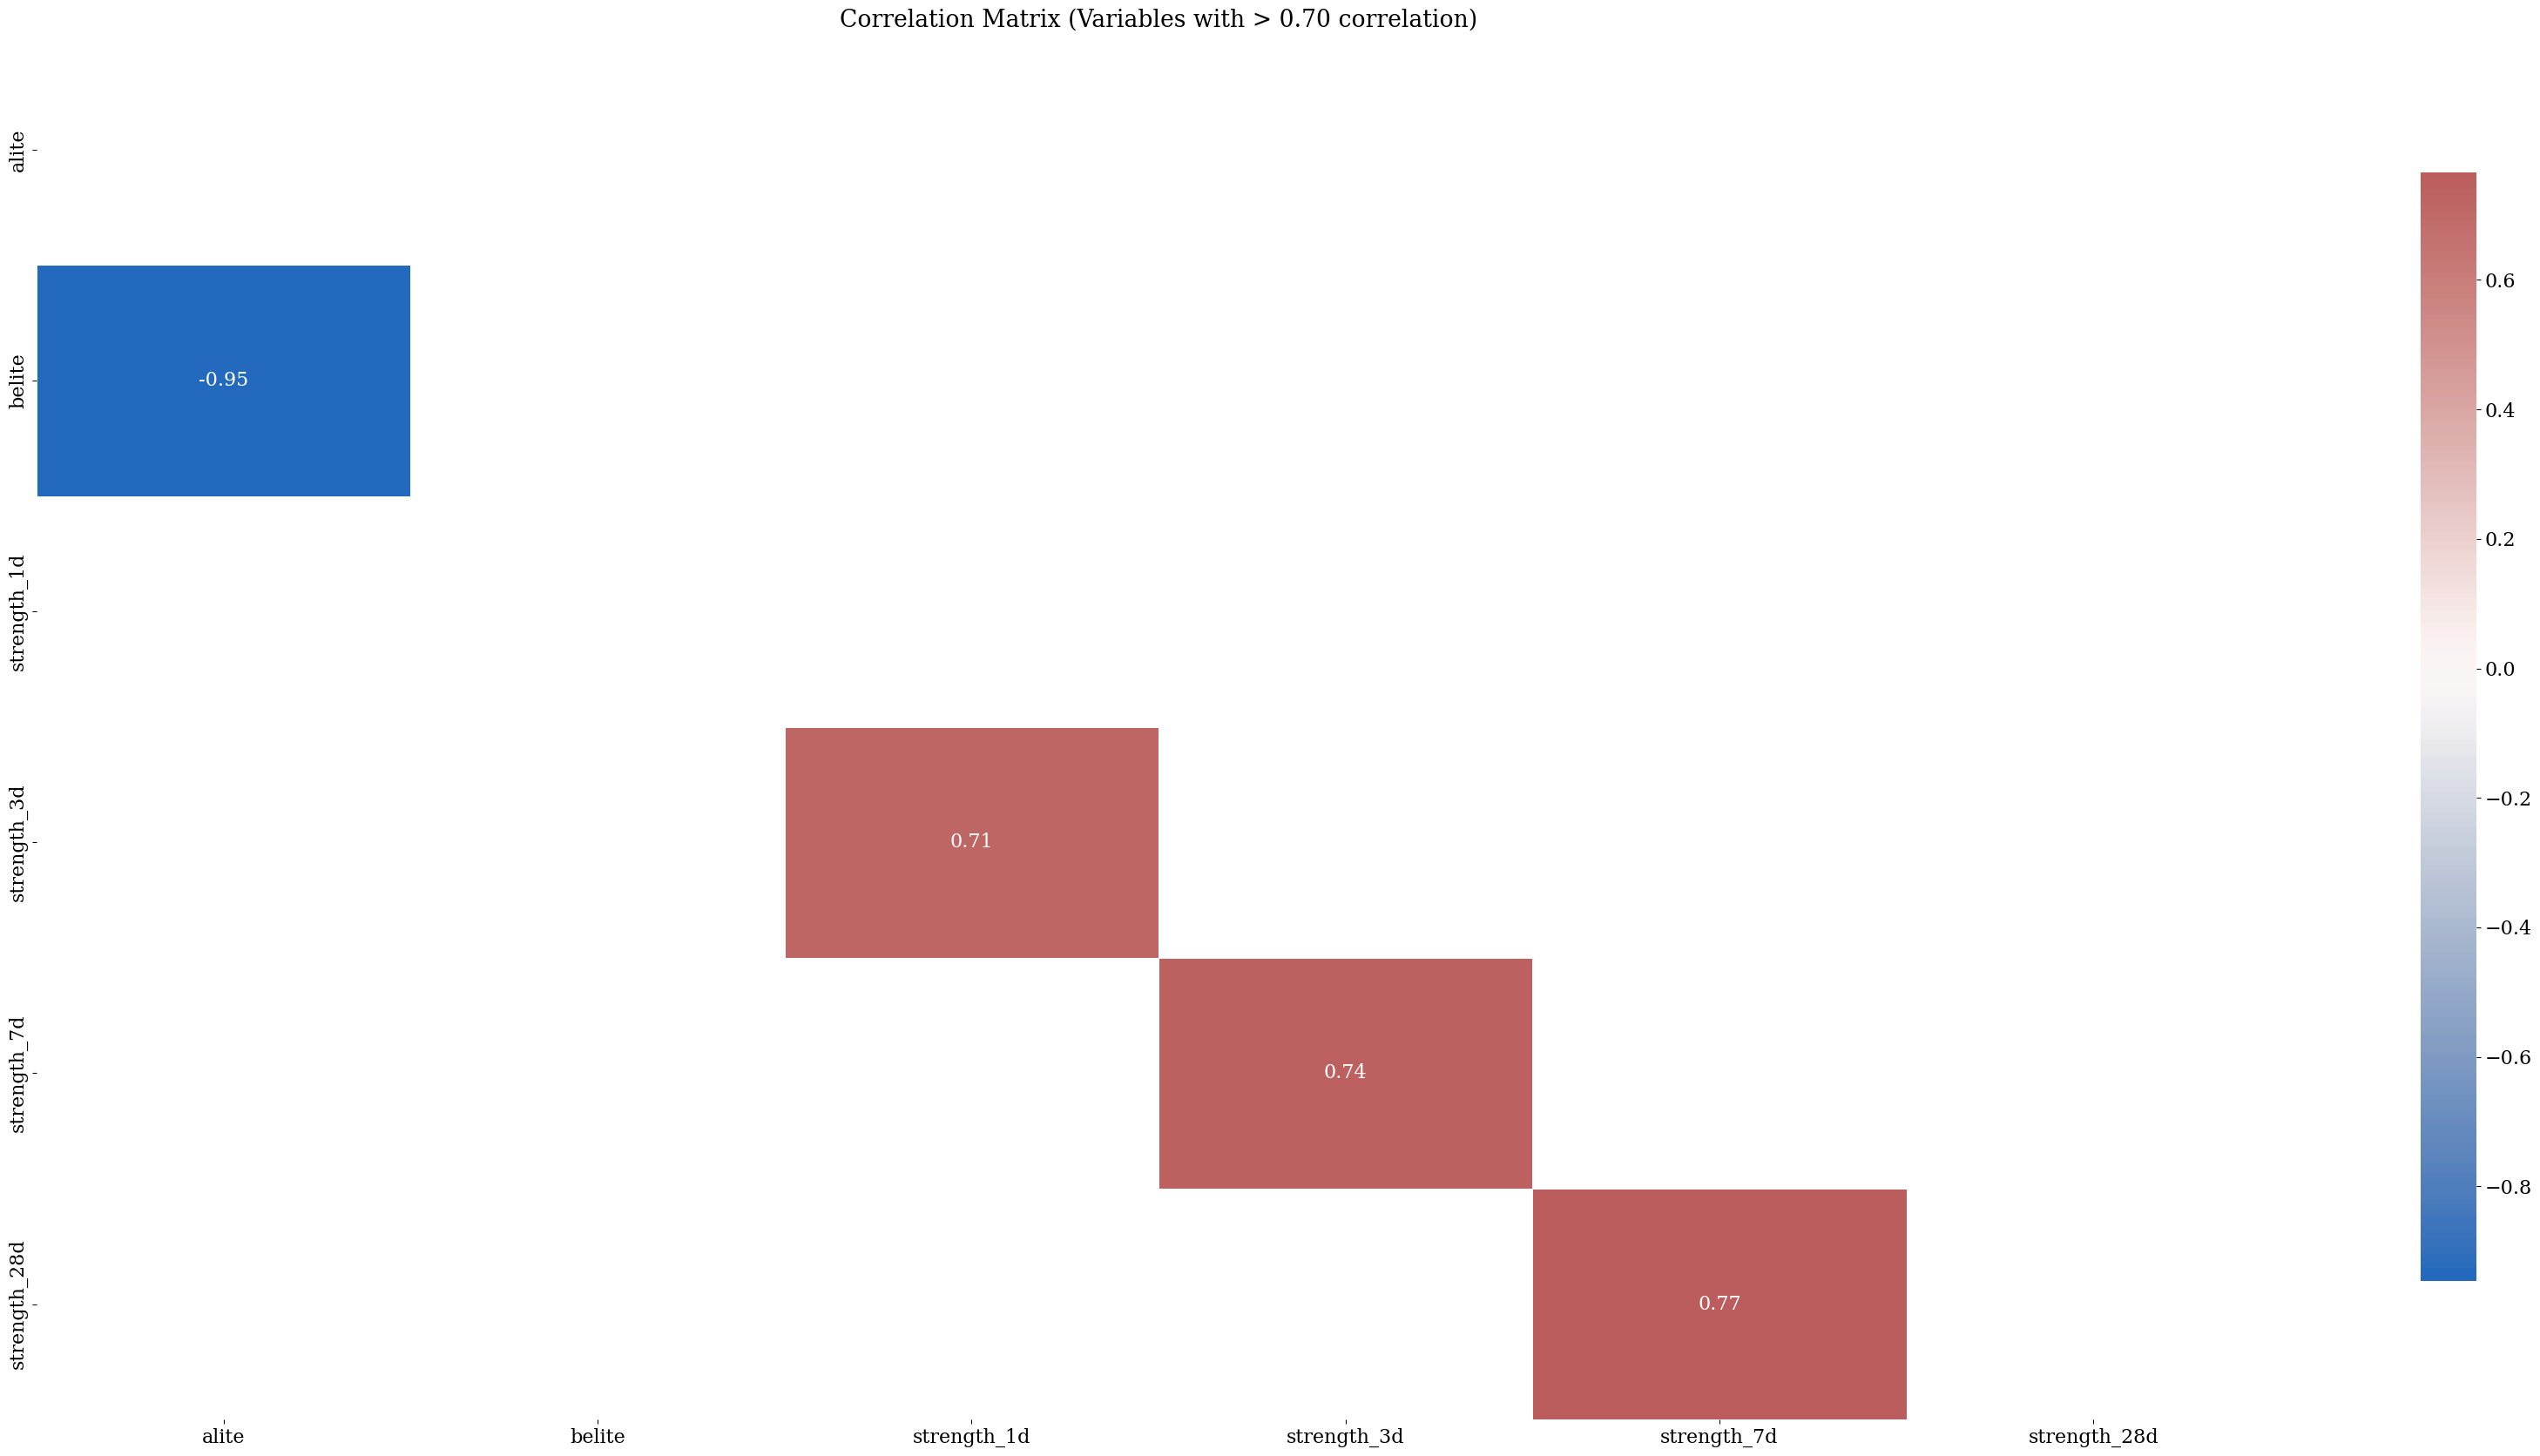

<IPython.core.display.Javascript object>

In [37]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [38]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite        belite          0.946159
strength_7d  strength_28d    0.765460
strength_3d  strength_7d     0.744546
strength_1d  strength_3d     0.712638
dtype: float64

<IPython.core.display.Javascript object>

In [39]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.765460
strength_3d      strength_28d    0.648292
strength_1d      strength_28d    0.577446
alite            strength_28d    0.338964
belite           strength_28d    0.332806
sample_id_plant  strength_28d    0.233471
aluminate        strength_28d    0.233069
strength_28d     blaine          0.194325
water_demand     strength_28d    0.182437
loi              strength_28d    0.154809
mgo              strength_28d    0.148188
strength_28d     sieve_32um      0.142950
free_lime        strength_28d    0.126351
na2o             strength_28d    0.058866
ferrite          strength_28d    0.048618
strength_28d     sieve_45um      0.048550
cao              strength_28d    0.029481
so3              strength_28d    0.026827
fe2o3            strength_28d    0.020698
k2o              strength_28d    0.015502
al2o3            strength_28d    0.011305
sio2             strength_28d    0.010234
setting_initial  strength_28d    0.004094
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

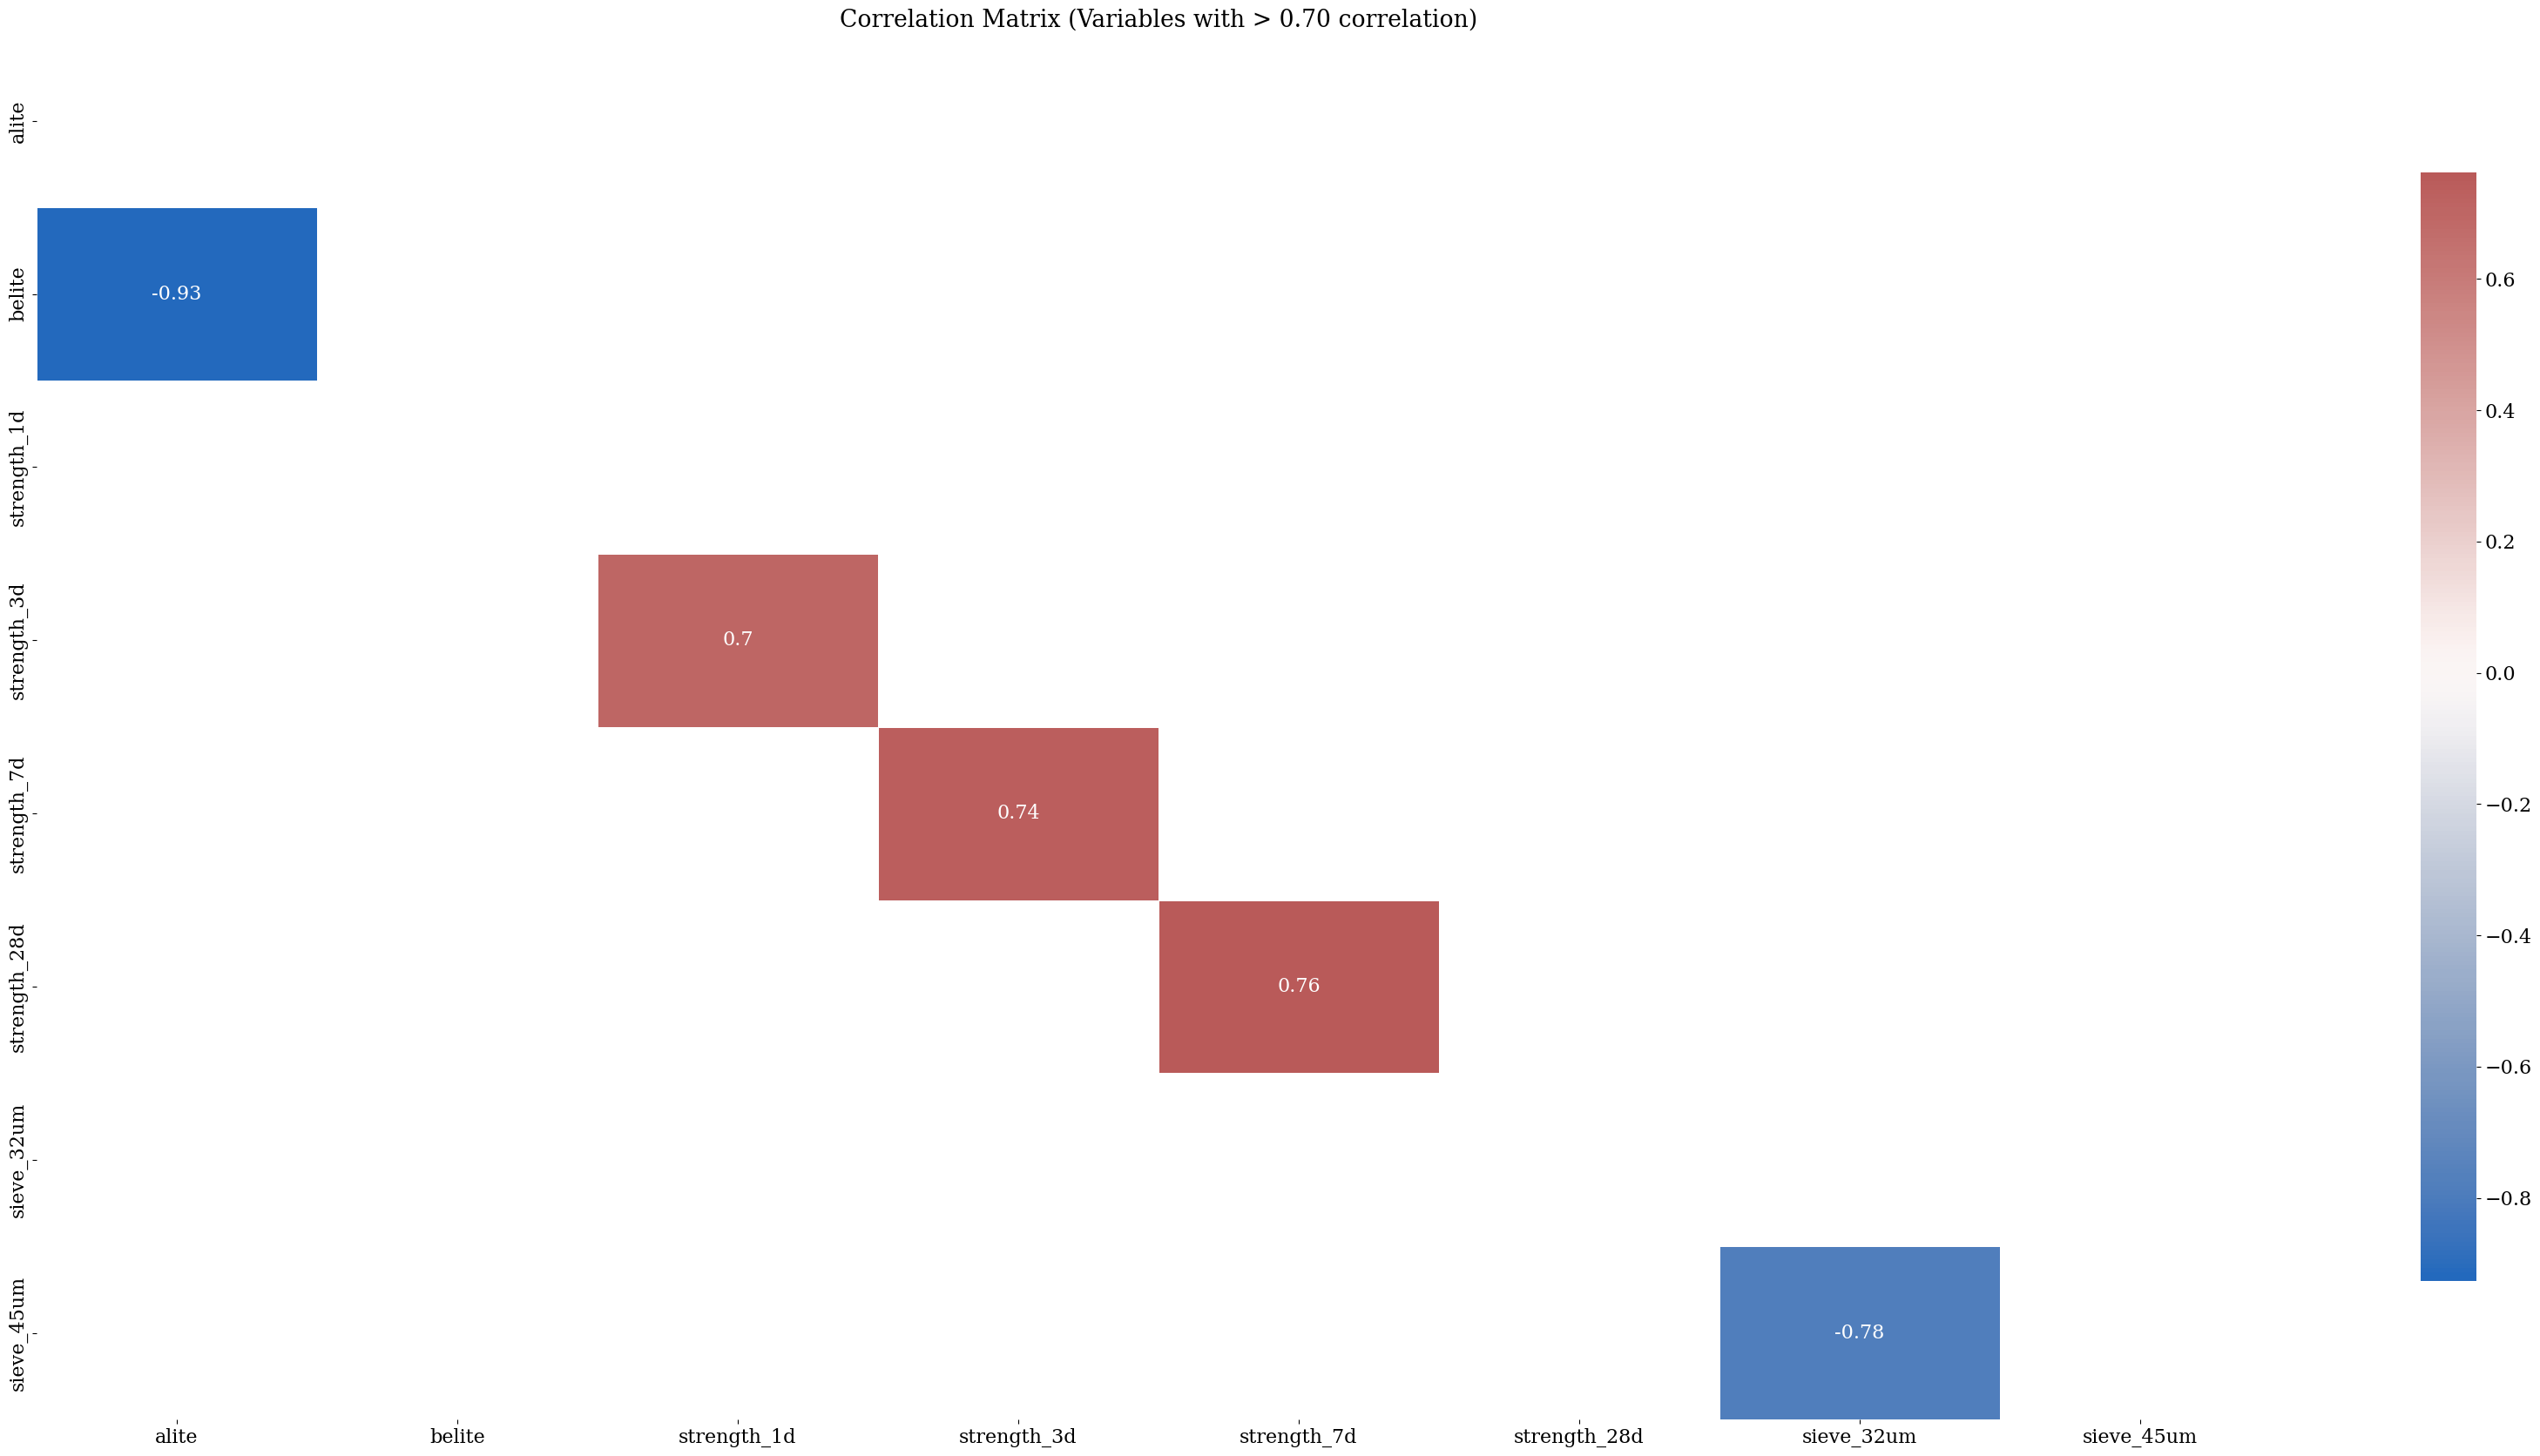

<IPython.core.display.Javascript object>

In [40]:
df_corr = df.select_dtypes(exclude=object).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [41]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite        belite          0.926743
sieve_32um   sieve_45um      0.784524
strength_7d  strength_28d    0.761910
strength_3d  strength_7d     0.739641
strength_1d  strength_3d     0.702868
dtype: float64

<IPython.core.display.Javascript object>

In [42]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.761910
strength_3d      strength_28d    0.637739
strength_1d      strength_28d    0.563494
alite            strength_28d    0.358604
belite           strength_28d    0.331782
aluminate        strength_28d    0.225480
strength_28d     blaine          0.189445
sample_id_plant  strength_28d    0.181762
water_demand     strength_28d    0.169212
strength_28d     sieve_45um      0.169211
loi              strength_28d    0.156055
strength_28d     sieve_32um      0.144639
free_lime        strength_28d    0.134341
mgo              strength_28d    0.123325
na2o             strength_28d    0.083450
ferrite          strength_28d    0.056104
cao              strength_28d    0.019107
al2o3            strength_28d    0.016179
sio2             strength_28d    0.015155
so3              strength_28d    0.010001
setting_initial  strength_28d    0.005491
k2o              strength_28d    0.003144
fe2o3            strength_28d    0.000511
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

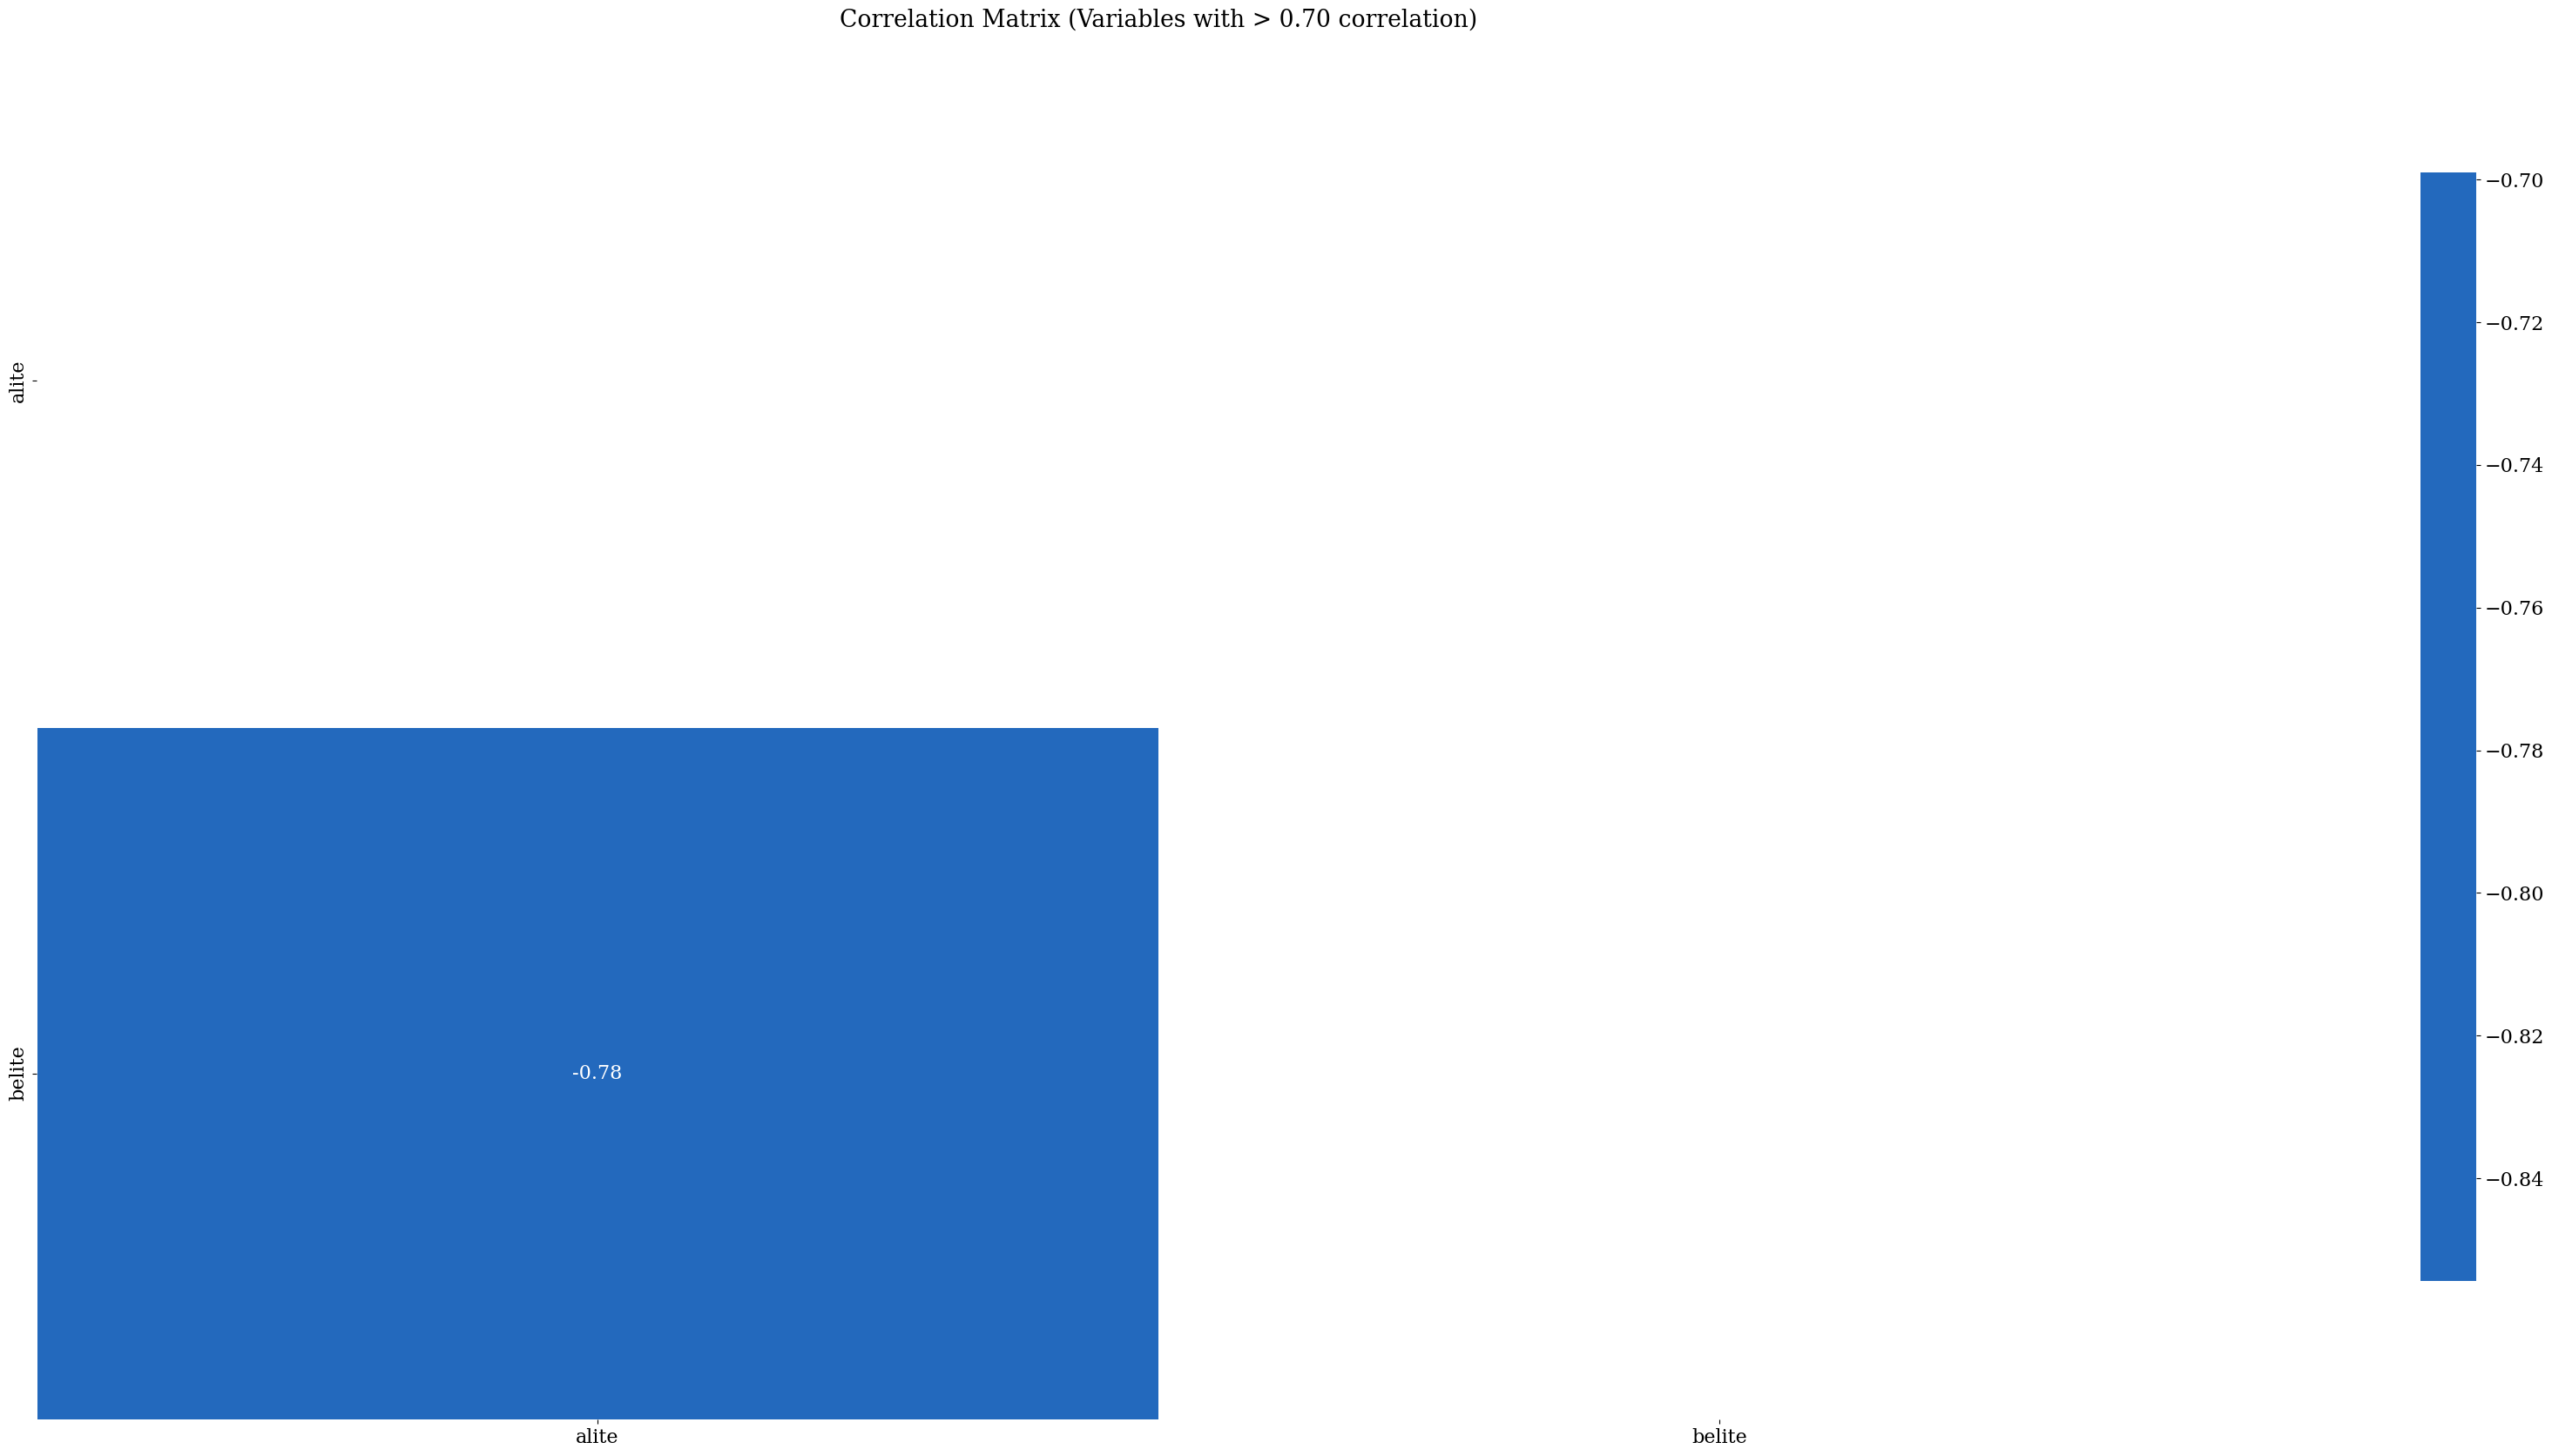

<IPython.core.display.Javascript object>

In [43]:
df_corr = df.select_dtypes(exclude=object).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [44]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

alite  belite    0.77673
dtype: float64

<IPython.core.display.Javascript object>

In [45]:
sol[sol.index.map(lambda x: "strength_28d" in x)]

strength_7d      strength_28d    0.566733
strength_3d      strength_28d    0.456307
strength_1d      strength_28d    0.397906
alite            strength_28d    0.247120
belite           strength_28d    0.226729
aluminate        strength_28d    0.153287
water_demand     strength_28d    0.128257
strength_28d     blaine          0.126387
sample_id_plant  strength_28d    0.115854
strength_28d     sieve_45um      0.112599
loi              strength_28d    0.106008
strength_28d     sieve_32um      0.092270
free_lime        strength_28d    0.085884
mgo              strength_28d    0.083033
na2o             strength_28d    0.057153
ferrite          strength_28d    0.039984
cao              strength_28d    0.013903
al2o3            strength_28d    0.009938
sio2             strength_28d    0.009064
so3              strength_28d    0.008769
k2o              strength_28d    0.003886
setting_initial  strength_28d    0.003857
fe2o3            strength_28d    0.000748
dtype: float64

<IPython.core.display.Javascript object>

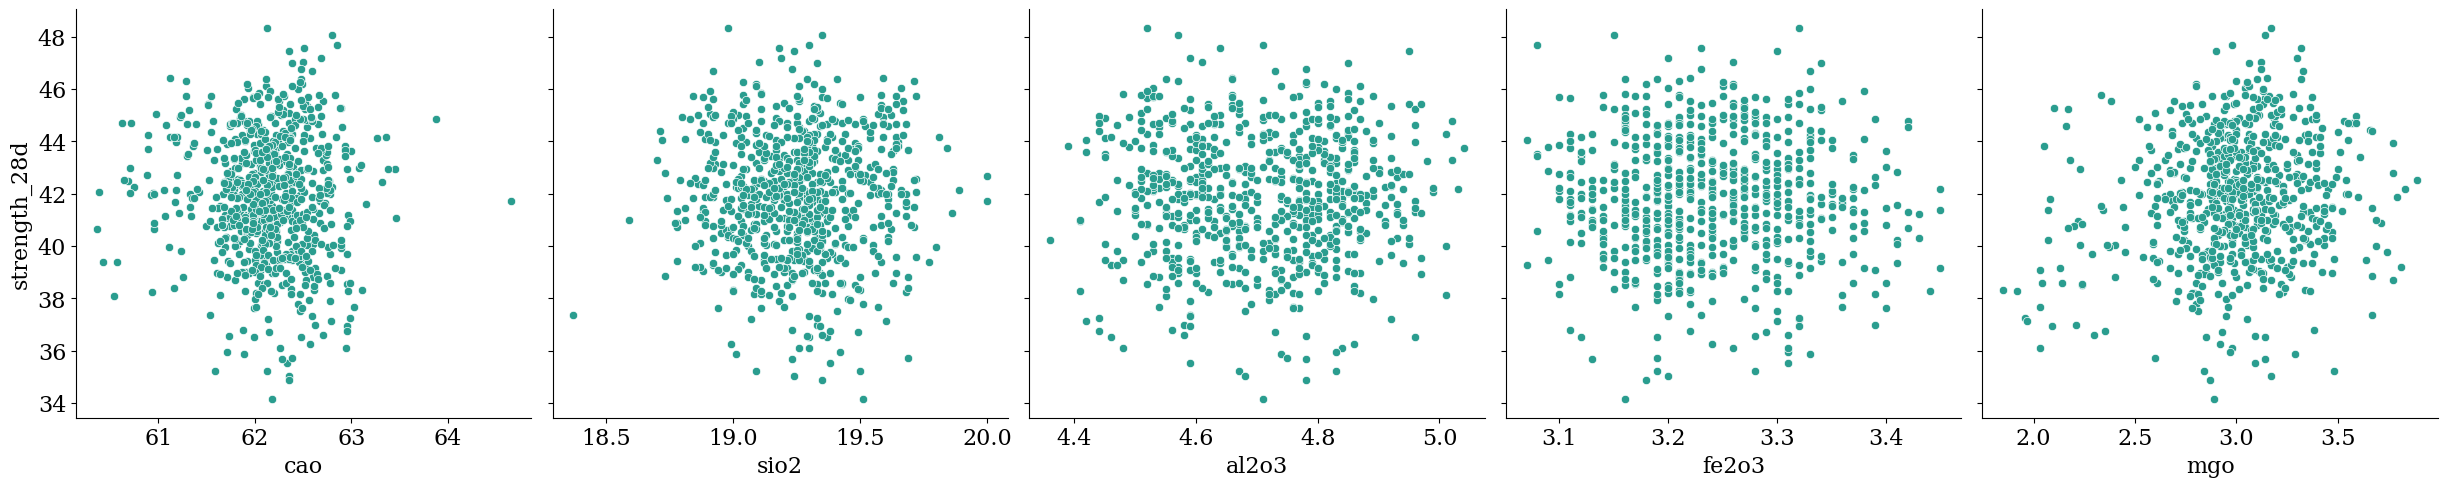

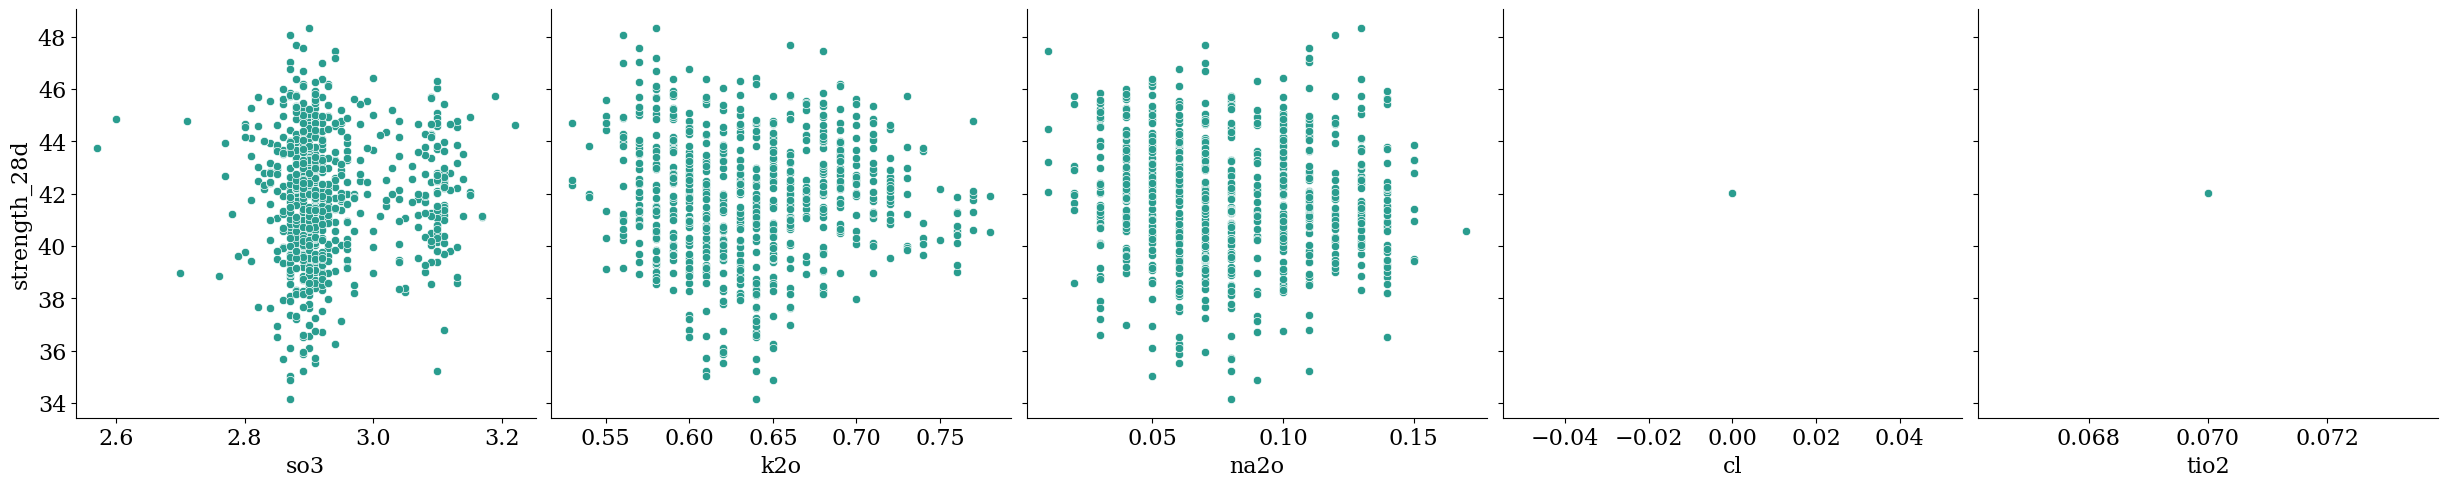

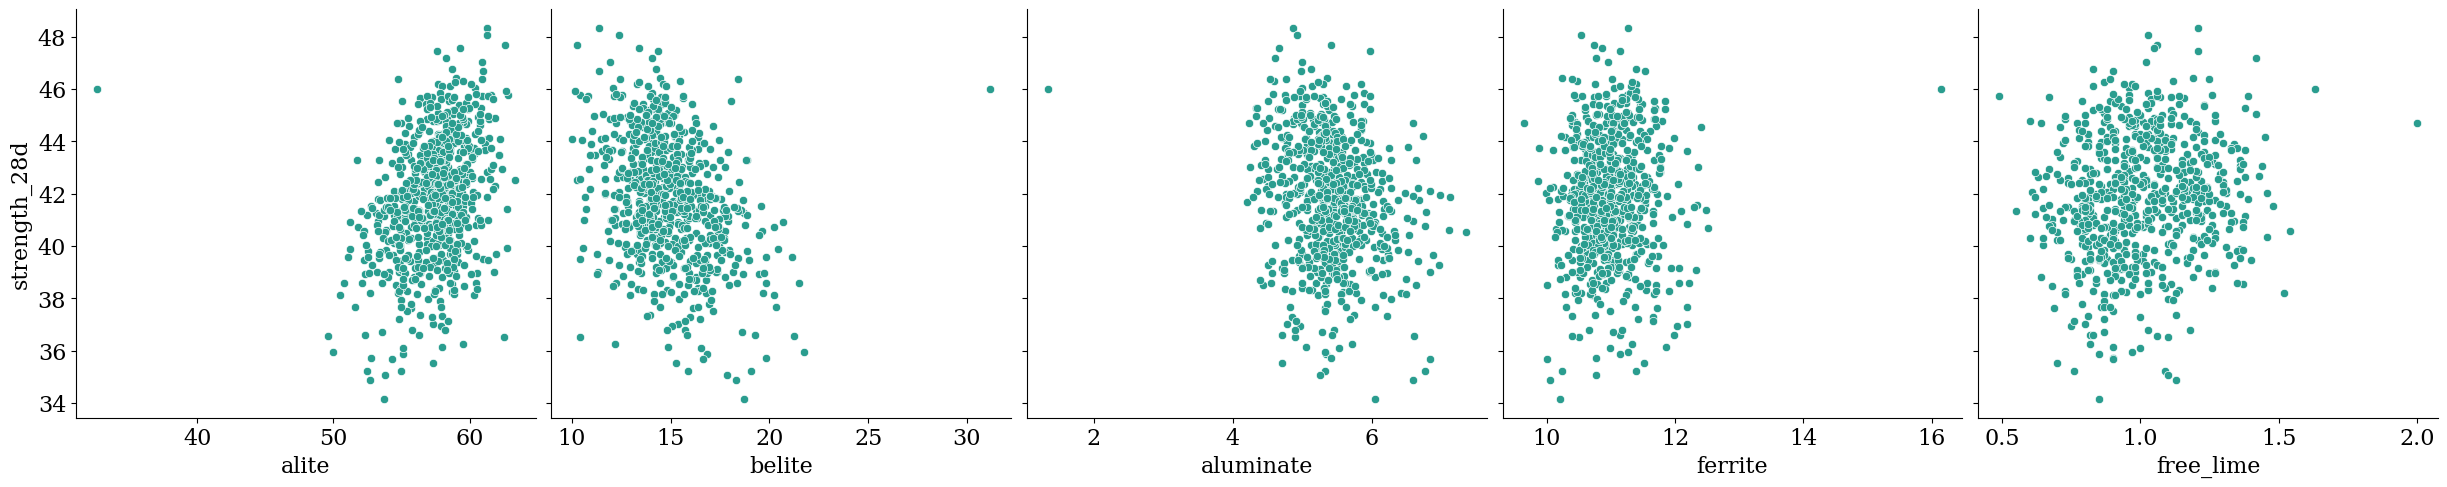

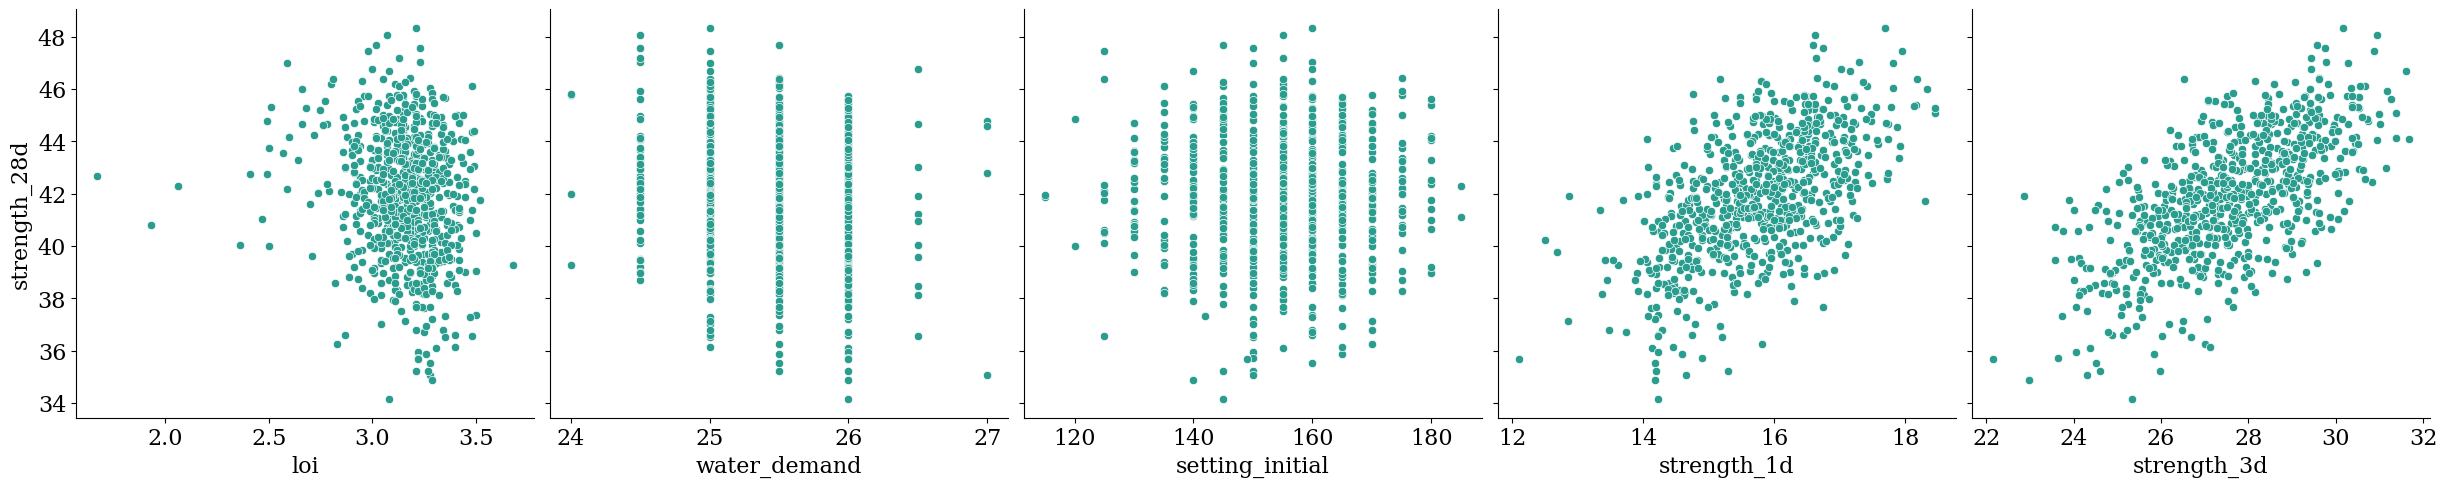

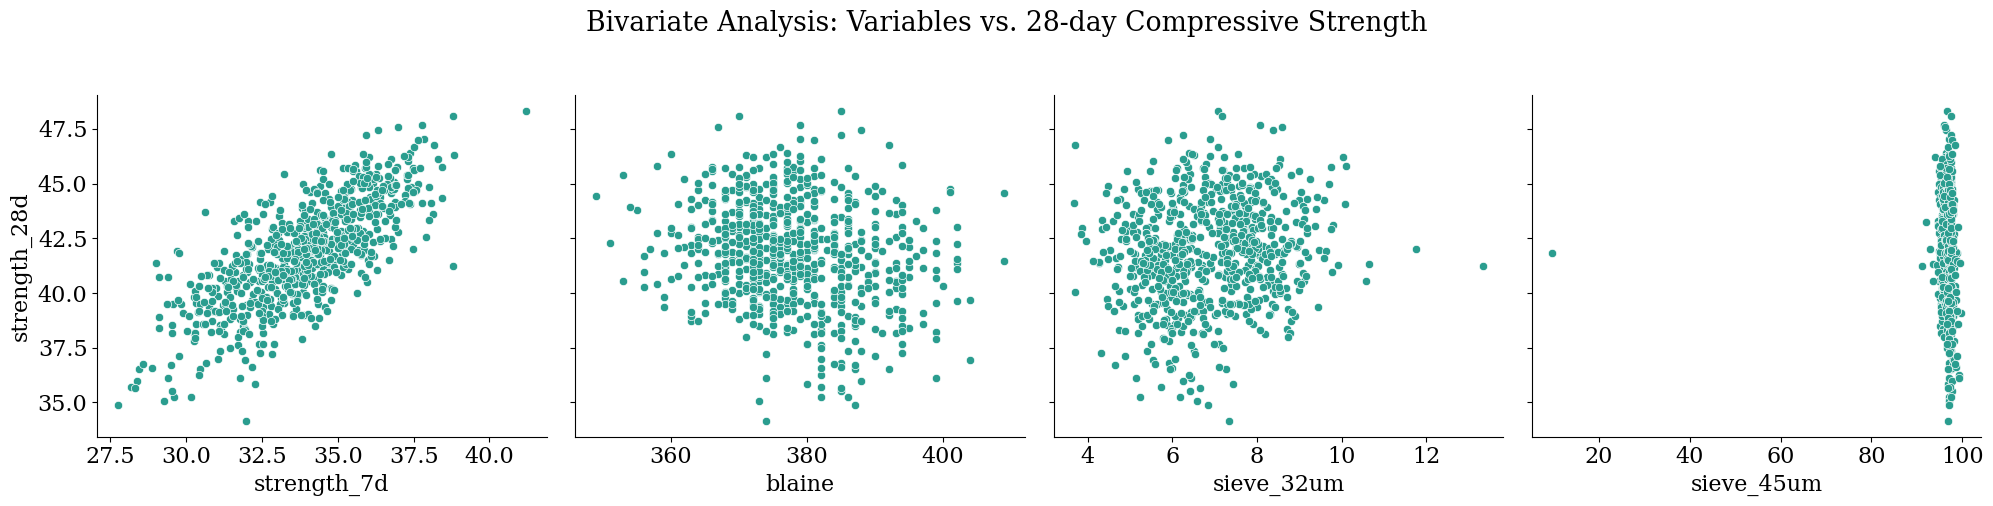

<IPython.core.display.Javascript object>

In [46]:
num_lines = 5
plots_per_line = 5

variables_to_plot = df[df.columns[4:]].select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("strength_28d")


for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        data=df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["strength_28d"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

grid.fig.suptitle(
    "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
)
plt.tight_layout()
plt.show()

In [47]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

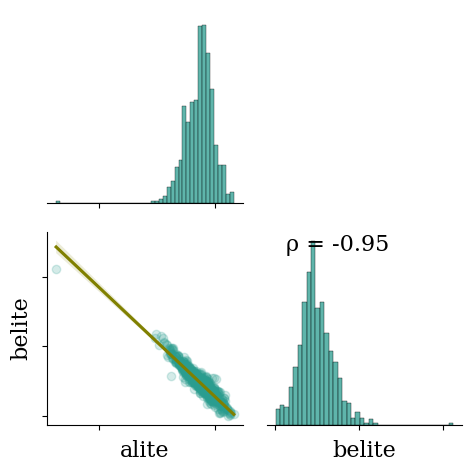

<IPython.core.display.Javascript object>

In [48]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [49]:
dates

0      2020-01-01 11:00:00+00:00
1      2020-01-02 11:00:00+00:00
2      2020-01-03 11:00:00+00:00
3      2020-01-04 11:00:00+00:00
4      2020-01-07 11:00:00+00:00
                 ...            
730    2021-12-23 11:00:00+00:00
731    2021-12-24 11:00:00+00:00
732    2021-12-25 11:00:00+00:00
733    2021-12-26 11:00:00+00:00
734    2021-12-31 11:00:00+00:00
Name: sample_date, Length: 735, dtype: object

<IPython.core.display.Javascript object>

In [50]:
dates = pd.to_datetime(dates)

<IPython.core.display.Javascript object>

In [51]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

479 valid days out of 675


<IPython.core.display.Javascript object>

In [52]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021}


<IPython.core.display.Javascript object>

In [53]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

<IPython.core.display.Javascript object>

In [54]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        25
      2        28
      3        31
      4        30
      5        31
      6        30
      7        31
      8        31
      9        30
      10       31
      11       30
      12       30
2021  1        28
      2        22
      3        30
      4        30
      5        29
      6        29
      7        17
      8        30
      9        29
      10       23
      11       25
      12       25
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

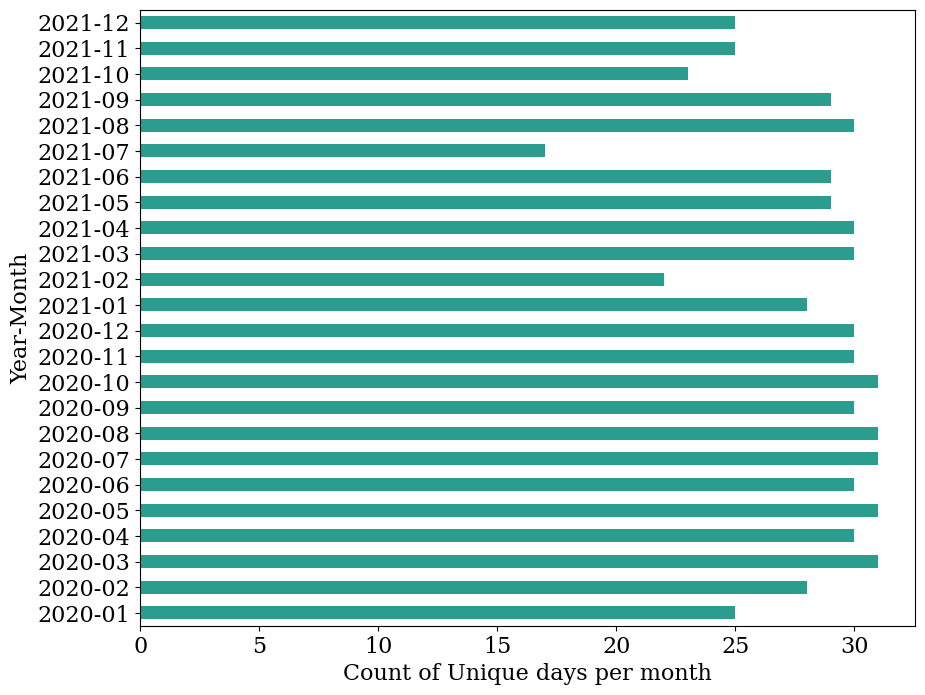

<IPython.core.display.Javascript object>

In [55]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [56]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  1        28
      2        31
      3        35
      4        30
      5        33
      6        41
      7        35
      8        31
      9        34
      10       37
      11       35
      12       33
2021  1        28
      2        22
      3        35
      4        34
      5        35
      6        29
      7        17
      8        30
      9        29
      10       23
      11       25
      12       25
Name: size, dtype: int64


<IPython.core.display.Javascript object>

In [57]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

<IPython.core.display.Javascript object>

In [58]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2021-7 has the minimum number of days with samples - 17
2020-6 has the maximum number of days with samples - 41


<IPython.core.display.Javascript object>

In [59]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  675.000000
mean     1.088889
std      0.284794
min      1.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      2.000000

<IPython.core.display.Javascript object>

In [60]:
day_counts[["DayCount"]].value_counts()

DayCount
1           615
2            60
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [61]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
7    2020      1   10         2
8    2020      1   11         2
15   2020      1   20         2
36   2020      2   12         2
49   2020      2   26         2
52   2020      2   29         2
61   2020      3    9         2
62   2020      3   10         2
63   2020      3   11         2
64   2020      3   12         2
138  2020      5   25         2
144  2020      5   31         2
145  2020      6    1         2
146  2020      6    2         2
152  2020      6    8         2
153  2020      6    9         2
154  2020      6   10         2
155  2020      6   11         2
156  2020      6   12         2
159  2020      6   15         2
160  2020      6   16         2
161  2020      6   17         2
163  2020      6   19         2
179  2020      7    5         2
181  2020      7    7         2
186  2020      7   12         2
193  2020      7   19         2
255  2020      9   19         2
256  2020      9   20         2
257  2020      9   21         2
258  2020      9   22         2
277  2020     10   11         2
284  2020     10   18         2
292  2020     10   26         2
293  2020     10   27         2
294  2020     10   28         2
295  2020     10   29         2
306  2020     11    9         2
323  2020     11   26         2
324  2020     11   27         2
325  2020     11   28         2
327  2020     11   30         2
340  2020     12   14         2
341  2020     12   15         2
342  2020     12   16         2
431  2021      3   25         2
432  2021      3   26         2
434  2021      3   28         2
435  2021      3   29         2
436  2021      3   30         2
451  2021      4   14         2
456  2021      4   19         2
457  2021      4   20         2
458  2021      4   21         2
472  2021      5    5         2
473  2021      5    6         2
474  2021      5    7         2
475  2021      5    8         2
476  2021      5    9         2
492  2021      5   26         2

<IPython.core.display.Javascript object>

In [62]:
df_copy = df.copy()
df_copy["sample_date"] = pd.to_datetime(df_copy["sample_date"])
df_copy["Year"] = df_copy["sample_date"].dt.year
df_copy["Month"] = df_copy["sample_date"].dt.month
df_copy["Day"] = df_copy["sample_date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = df_merge[df_merge["DayCount"] == daycount]["strength_28d"].isna().sum()
    print(daycount, nulls)

1 0
2 0


<IPython.core.display.Javascript object>

In [63]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [64]:
# Average Frequency
np.mean(diffs)

Timedelta('0 days 23:52:09.155313351')

<IPython.core.display.Javascript object>

In [65]:
Counter(diffs)

Counter({Timedelta('1 days 00:00:00'): 637,
         Timedelta('0 days 00:00:00'): 60,
         Timedelta('2 days 00:00:00'): 26,
         Timedelta('3 days 00:00:00'): 4,
         Timedelta('0 days 23:00:00'): 2,
         Timedelta('1 days 01:00:00'): 2,
         Timedelta('6 days 00:00:00'): 1,
         Timedelta('14 days 00:00:00'): 1,
         Timedelta('5 days 00:00:00'): 1})

<IPython.core.display.Javascript object>

In [66]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

<Axes: xlabel='count'>

<IPython.core.display.Javascript object>

In [67]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[86.67, 0.54, 8.16, 3.54, 0.27, 0.27, 0.14, 0.14, 0.14]

<IPython.core.display.Javascript object>

In [68]:
df["sample_date"] = pd.to_datetime(df["sample_date"])

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Days

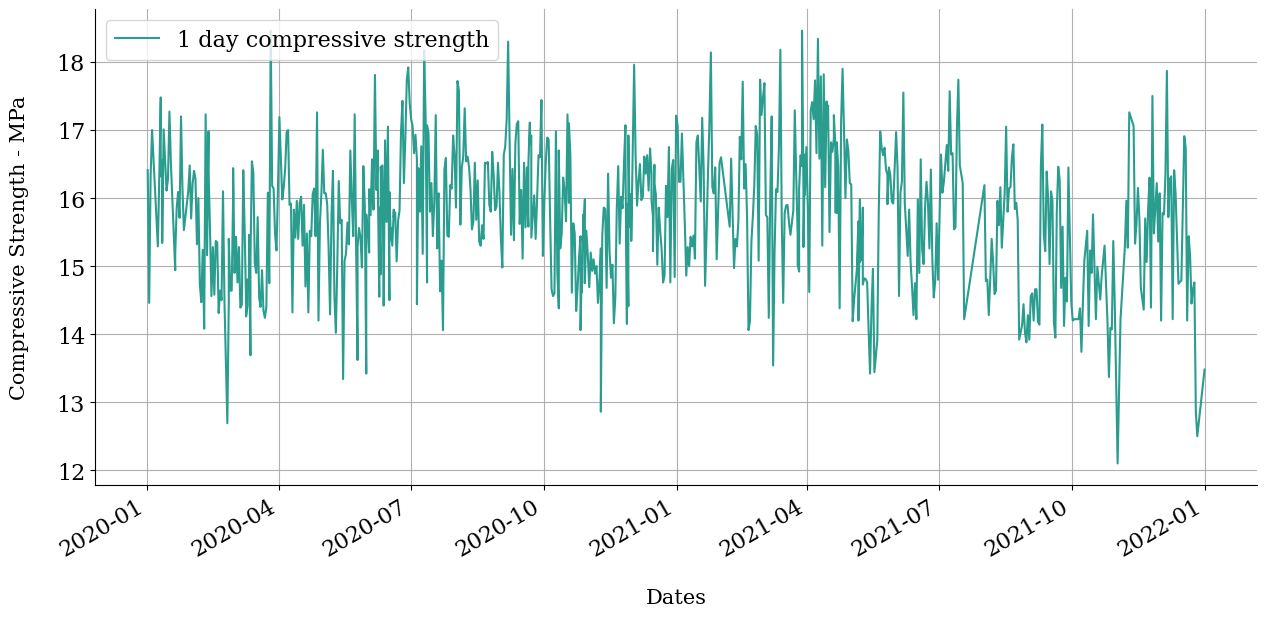

<IPython.core.display.Javascript object>

In [69]:
tmp = df[["sample_date", "strength_1d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 3 Days

In [70]:
tmp = df[["sample_date", "strength_3d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

<IPython.core.display.Javascript object>

#### 7 Days

In [71]:
tmp = df[["sample_date", "strength_7d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

<IPython.core.display.Javascript object>

#### 28 Days

In [72]:
tmp = df[["sample_date", "strength_28d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

<IPython.core.display.Javascript object>